In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_red= pd.read_csv('df_red.csv')
df_green= pd.read_csv('df_green.csv')
df_yellow= pd.read_csv('df_yellow.csv')

In [5]:
df_red

,week_end_dt,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,...,china_total_price_shift_5_Rolling_6,china_total_price_shift_5_Rolling_7,china_total_price_shift_6_Rolling_2,china_total_price_shift_6_Rolling_4,china_total_price_shift_6_Rolling_6,china_total_price_shift_6_Rolling_7,china_total_price_shift_7_Rolling_2,china_total_price_shift_7_Rolling_4,china_total_price_shift_7_Rolling_6,china_total_price_shift_7_Rolling_7
0,2016-02-21,6.924475,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
1,2016-02-28,6.825035,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2,2016-03-06,6.649885,2364682.6,303703.3,28653.3,2032325.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
3,2016-03-13,6.649885,2208782.3,264377.9,0.0,1944404.3,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
4,2016-03-20,6.649885,2647120.3,453094.5,0.0,2194025.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2023-09-03,6.984959,2250074.0,118628.5,4300.7,1629389.8,482332.7,15422.1,0,0,...,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143,208487.040,331490.5875,293778.626667,266905.207143
394,2023-09-10,6.785139,2183336.1,82404.5,0.0,1692231.9,377855.4,23133.1,0,0,...,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143
395,2023-09-17,6.735184,2416993.0,45361.3,0.0,2016678.1,312769.5,42184.0,0,0,...,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429
396,2023-09-24,7.334644,2761128.0,8695.6,29937.0,2530027.4,180220.8,12246.9,0,0,...,564303.621667,503137.144286,612998.240,701029.9725,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000


In [6]:
df_red.set_index('week_end_dt', inplace= True)
df_green.set_index('week_end_dt', inplace= True)
df_yellow.set_index('week_end_dt', inplace= True)

In [7]:
len(df_red)

398

In [8]:
models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor",
                    "XGBRFRegressor","AdaBoostRegressor","LGBMRegressor","CatBoostRegressor"]

models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


In [9]:
red_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'demand_shift_4_Rolling_2',
 'vietnam',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_4',
 'vietnam_season_2',
 'price_shift_4_Rolling_6',
 'demand_shift_4_Rolling_4',
 'jordan_min_price_shift_5_Rolling_2',
 'india_season_shift_7_Rolling_7',
 'price_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_6',
 'jordan_max_price_shift_4_Rolling_4',
 'india_season_shift_7_Rolling_6',
 'demand_shift_4_Rolling_6',
                           'price']

green_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_6_Rolling_6',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_5_Rolling_2',
 'jordan_min_price_shift_4_Rolling_2',
 'brazil_season_shift_4_Rolling_7',
 'price_shift_4_Rolling_6',
 'vietnam_season_2_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'vietnam_season_2',
 'price_shift_4_Rolling_7',
 'brazil_season_shift_4_Rolling_6',
 'price_shift_5_Rolling_4',
 'brazil_season_shift_4_Rolling_4',
 'jordan_min_price_shift_4_Rolling_4',
 'brazil_season_shift_5_Rolling_4',
 'indonesia',
 'jordan_max_price_shift_4_Rolling_4',
                             'price']

yellow_selected_features_12= ['price_shift_4_Rolling_2',
 'india_shift_4_Rolling_6',
 'jordan_min_price_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'india_season_shift_5_Rolling_7',
 'jordan_min_price_shift_4_Rolling_4',
 'jordan_max_price_shift_4_Rolling_4',
 'price_shift_4_Rolling_6',
 'brazil',
 'jordan_min_price_shift_5_Rolling_2',
 'jordan_max_price_shift_5_Rolling_2',
 'price_shift_5_Rolling_4',
 'india_season_shift_6_Rolling_7',
 'price_shift_4_Rolling_7',
 'brazil_total_price_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_6',
 'price_shift_6_Rolling_2',
                              'price']

In [10]:
df_red_12feat=df_red[red_selected_features_12]
df_green_12feat=df_green[green_selected_features_12]
df_yellow_12feat=df_yellow[yellow_selected_features_12]

In [11]:
red_train=df_red[:-16]
red_test= df_red[-16:]
n_train =len(red_train)
forecast_horizon= 4

In [12]:

def rolling_origin(df, n_train, forecast_horizon, models):
    mae_results = {}
    model_data = []

    for i in range(n_train, len(df) - forecast_horizon + 1):
        train_data = df[i - n_train:i]
        test_data = df[i:i + forecast_horizon]

        X_train = train_data.drop('price', axis=1)
        y_train = train_data['price']

        X_test = test_data.drop('price', axis=1)
        y_test = test_data['price']

        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            model_name = model.__class__.__name__

            if model_name not in mae_results:
                mae_results[model_name] = []

            mae_results[model_name].append(mae)

            row = {
                'window': i - n_train,
                'week_end_dt': y_test.index.values,
                'model_name': model_name,
                'mae': mae,
                'y_test': y_test.values,
                'y_pred': y_pred
            }

            model_data.append(row)

    for model_name, mae_list in mae_results.items():
        print(f'Model: {model_name}')
        for i, mae in enumerate(mae_list):
            print(f'Window {i + 1}: MAE = {mae:.4f}')

    return model_data


In [13]:
model_data_red= pd.DataFrame(rolling_origin(df_red_12feat, n_train, forecast_horizon, models))
model_data_green= pd.DataFrame(rolling_origin(df_green_12feat, n_train, forecast_horizon, models))
model_data_yellow= pd.DataFrame(rolling_origin(df_yellow_12feat, n_train, forecast_horizon, models))

Streaming output truncated to the last 5000 lines.
542:	learn: 0.2507145	total: 2.35s	remaining: 1.98s
543:	learn: 0.2501053	total: 2.35s	remaining: 1.97s
544:	learn: 0.2497010	total: 2.35s	remaining: 1.97s
545:	learn: 0.2494665	total: 2.36s	remaining: 1.96s
546:	learn: 0.2490260	total: 2.36s	remaining: 1.96s
547:	learn: 0.2488393	total: 2.37s	remaining: 1.95s
548:	learn: 0.2485305	total: 2.37s	remaining: 1.95s
549:	learn: 0.2483074	total: 2.38s	remaining: 1.94s
550:	learn: 0.2477817	total: 2.38s	remaining: 1.94s
551:	learn: 0.2476268	total: 2.38s	remaining: 1.93s
552:	learn: 0.2464565	total: 2.39s	remaining: 1.93s
553:	learn: 0.2460378	total: 2.39s	remaining: 1.93s
554:	learn: 0.2456336	total: 2.4s	remaining: 1.92s
555:	learn: 0.2449725	total: 2.4s	remaining: 1.92s
556:	learn: 0.2442307	total: 2.4s	remaining: 1.91s
557:	learn: 0.2439297	total: 2.41s	remaining: 1.91s
558:	learn: 0.2437981	total: 2.41s	remaining: 1.9s
559:	learn: 0.2428173	total: 2.42s	remaining: 1.9s
560:	learn: 0.2424

In [14]:
models_names

['DecisionTreeRegressor',
 'RandomForestRegressor',
 'SVR()',
 'LinearRegression',
 'XGBRegressor',
 'XGBRFRegressor',
 'AdaBoostRegressor',
 'LGBMRegressor',
 'CatBoostRegressor']

try each model and show the results

##1) DecisionTreeRegressor

In [15]:
def process_model_data(data_frame, model_name):
    model_data = data_frame[data_frame['model_name'] == model_name]
    model_data = model_data.explode(['week_end_dt', 'y_test', 'y_pred'])
    model_data['week_end_dt'] = pd.to_datetime(model_data['week_end_dt'])
    return model_data

In [16]:
DecisionTreeRegressor_model_red = process_model_data(model_data_red, 'DecisionTreeRegressor')
DecisionTreeRegressor_model_green = process_model_data(model_data_green, 'DecisionTreeRegressor')
DecisionTreeRegressor_model_yellow= process_model_data(model_data_yellow, 'DecisionTreeRegressor')

In [17]:
DecisionTreeRegressor_model_green['mae'].mean()

0.583099532692308

In [18]:
DecisionTreeRegressor_model_yellow['mae'].mean()

1.382735570192308

In [19]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

In [20]:
def process_weekly_data(data_frame, week_dates, model_name):
    df_result = pd.DataFrame()

    for dt in week_dates:
        df = pd.DataFrame(data_frame[data_frame['week_end_dt'] == dt].groupby(['week_end_dt', 'model_name']).agg({'mae': 'mean', 'y_test': 'mean', 'y_pred': 'mean'}))
        df_result = pd.concat([df_result, df], axis=0)

    df_result.reset_index(inplace=True)
    return df_result

In [21]:
df_DecisionTreeRegressor_red = process_weekly_data(DecisionTreeRegressor_model_red, week_dt, 'DecisionTreeRegressor' )
df_DecisionTreeRegressor_green = process_weekly_data(DecisionTreeRegressor_model_green, week_dt, 'DecisionTreeRegressor' )
df_DecisionTreeRegressor_yellow = process_weekly_data(DecisionTreeRegressor_model_yellow, week_dt, 'DecisionTreeRegressor' )

In [22]:
def process_outcome_data(data_frame, week_dates):
    outcome_data = data_frame['y_pred']
    new_date_index = pd.date_range(start=week_dates[0], end=week_dates[-1], freq="W")
    new_date_index = pd.DataFrame({"date": new_date_index})

    outcome_all = pd.concat([outcome_data, new_date_index], axis=1)
    outcome_all['date'] = pd.to_datetime(outcome_all['date'])
    outcome_all.set_index('date', inplace=True)

    return outcome_all

In [23]:
outcome_red_all= process_outcome_data(df_DecisionTreeRegressor_red, week_dt)
outcome_green_all= process_outcome_data(df_DecisionTreeRegressor_green, week_dt)
outcome_yellow_all= process_outcome_data(df_DecisionTreeRegressor_yellow, week_dt)

In [24]:
def process_actual_price_data(data_frame, num_samples):
    actual_data = data_frame['price'][-num_samples:]
    actual_data = actual_data.reset_index()
    actual_data['week_end_dt'] = pd.to_datetime(actual_data['week_end_dt'] )
    actual_data.set_index('week_end_dt', inplace=True)
    return actual_data

In [25]:
actual_df_red= process_actual_price_data(df_red_12feat, 50)
actual_df_green= process_actual_price_data(df_green_12feat, 50)
actual_df_yellow= process_actual_price_data(df_yellow_12feat, 50)

In [26]:
def plot_actual_vs_predicted(actual_data, outcome_data, color, y_min, y_max, model_name):


    fig, ax= plt.subplots(figsize=(20, 6))
    plt.plot(actual_data.index, actual_data, label='Actual Price', color='blue')
    plt.plot(outcome_data.index, outcome_data, label='Predicted Price', color= color)
    ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs. Predicted Prices ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

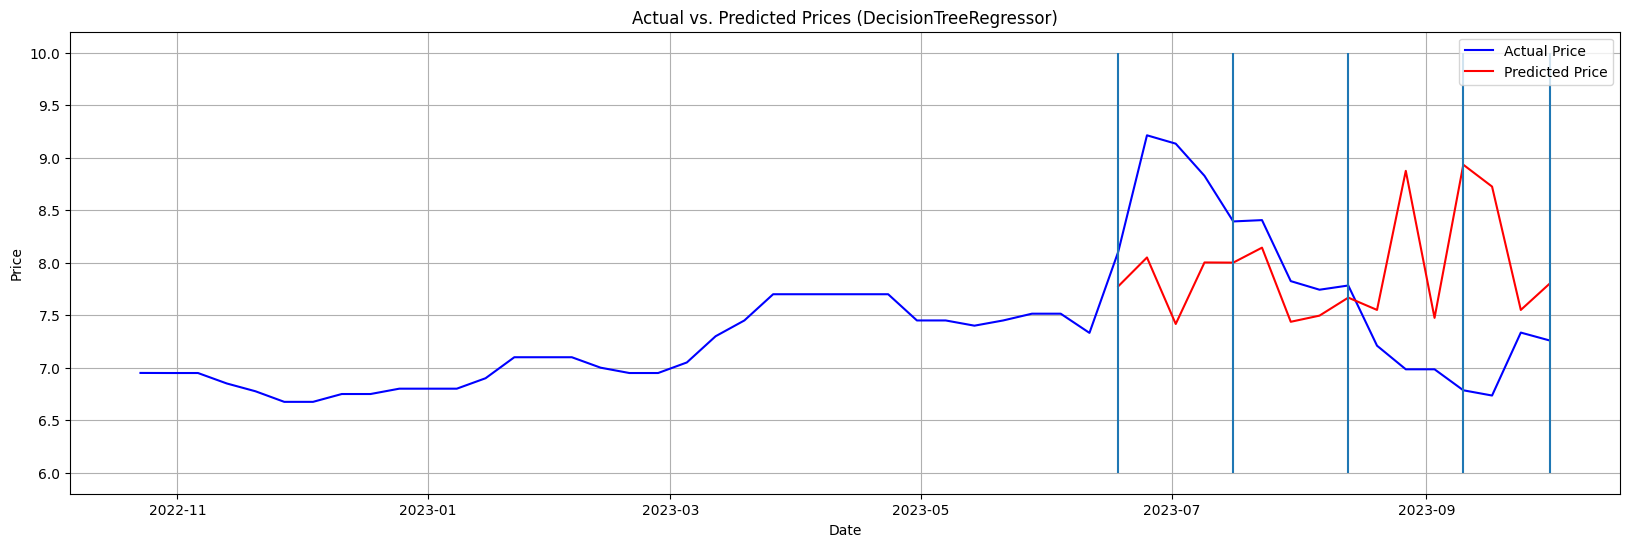

In [27]:
plot_actual_vs_predicted(actual_df_red, outcome_red_all, 'red', 6, 10, 'DecisionTreeRegressor' )

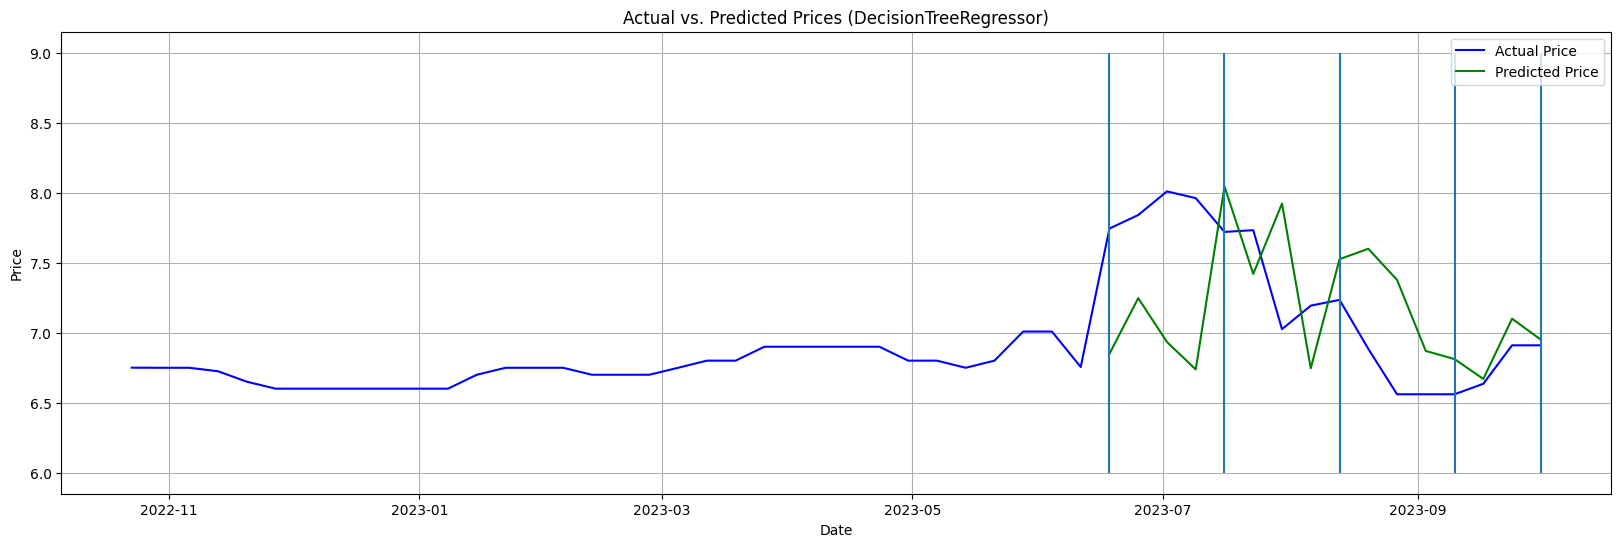

In [28]:
plot_actual_vs_predicted(actual_df_green, outcome_green_all, 'green',6 ,9, 'DecisionTreeRegressor' )

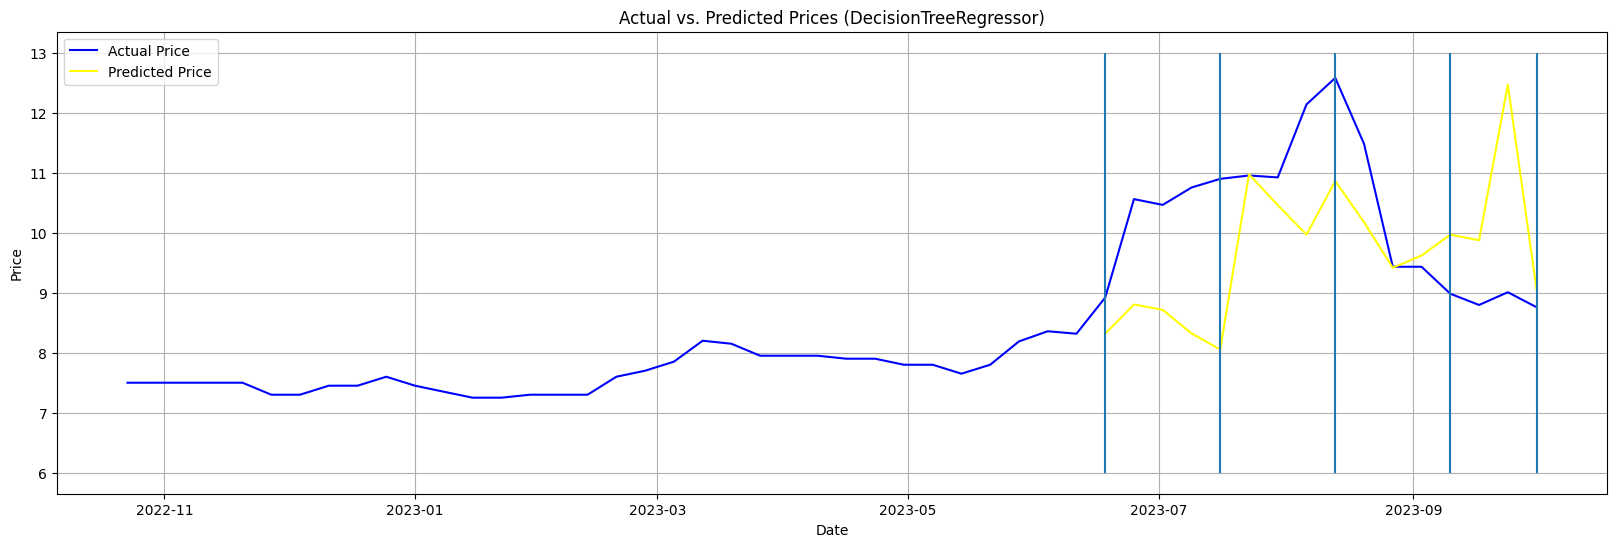

In [29]:
plot_actual_vs_predicted(actual_df_yellow, outcome_yellow_all, 'yellow',6 ,13, 'DecisionTreeRegressor' )

##2) RandomForestRegressor

In [30]:
RandomForestRegressor_model_red = process_model_data(model_data_red, 'RandomForestRegressor')
RandomForestRegressor_model_green = process_model_data(model_data_green, 'RandomForestRegressor')
RandomForestRegressor_model_yellow= process_model_data(model_data_yellow, 'RandomForestRegressor')

In [31]:
RandomForestRegressor_model_red['mae'].mean()

0.578133851673075

In [32]:
RandomForestRegressor_model_green['mae'].mean()

0.5361523026346167

In [33]:
RandomForestRegressor_model_yellow['mae'].mean()

1.3223211362115372

In [34]:
df_RandomForestRegressor_red = process_weekly_data(RandomForestRegressor_model_red, week_dt, 'RandomForestRegressor' )
df_RandomForestRegressor_green = process_weekly_data(RandomForestRegressor_model_green, week_dt, 'RandomForestRegressor' )
df_RandomForestRegressor_yellow = process_weekly_data(RandomForestRegressor_model_yellow, week_dt, 'RandomForestRegressor' )

In [35]:
RandomForestRegressor_outcome_red_all= process_outcome_data(df_RandomForestRegressor_red, week_dt)
RandomForestRegressor_outcome_green_all= process_outcome_data(df_RandomForestRegressor_green, week_dt)
RandomForestRegressor_outcome_yellow_all= process_outcome_data(df_RandomForestRegressor_yellow, week_dt)

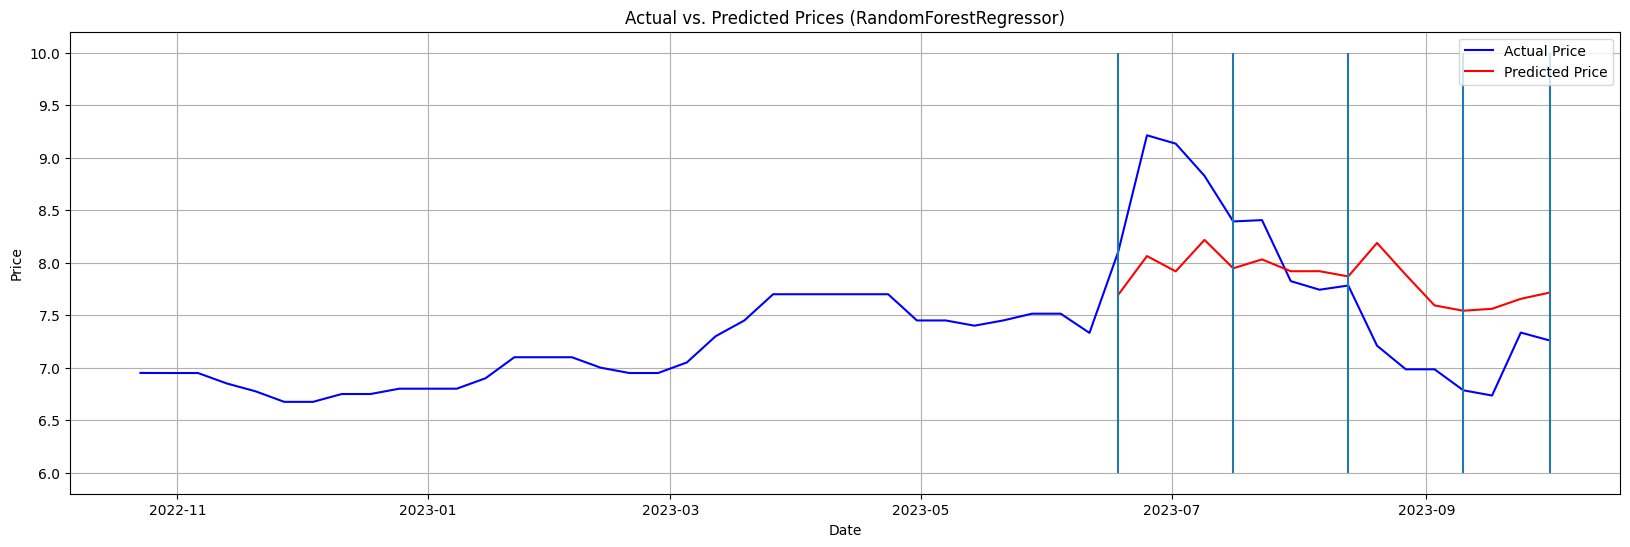

In [36]:
plot_actual_vs_predicted(actual_df_red, RandomForestRegressor_outcome_red_all, 'red', 6, 10, 'RandomForestRegressor' )

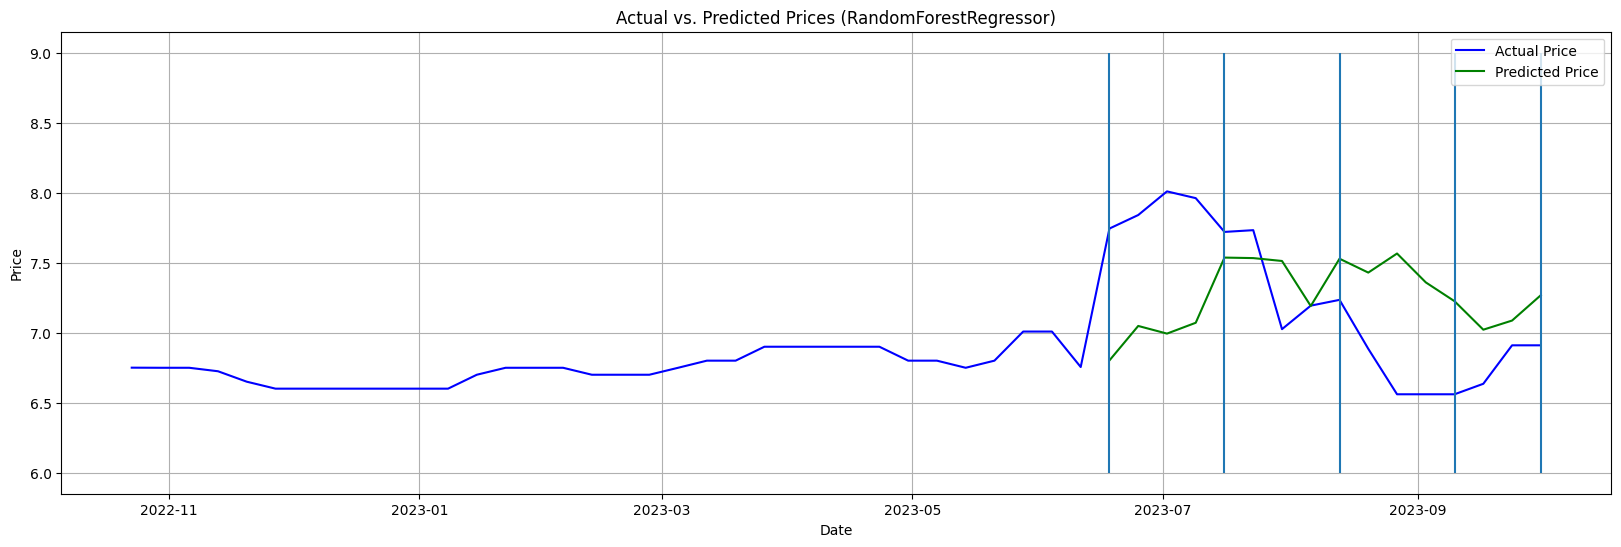

In [37]:
plot_actual_vs_predicted(actual_df_green, RandomForestRegressor_outcome_green_all, 'green',6 ,9, 'RandomForestRegressor' )

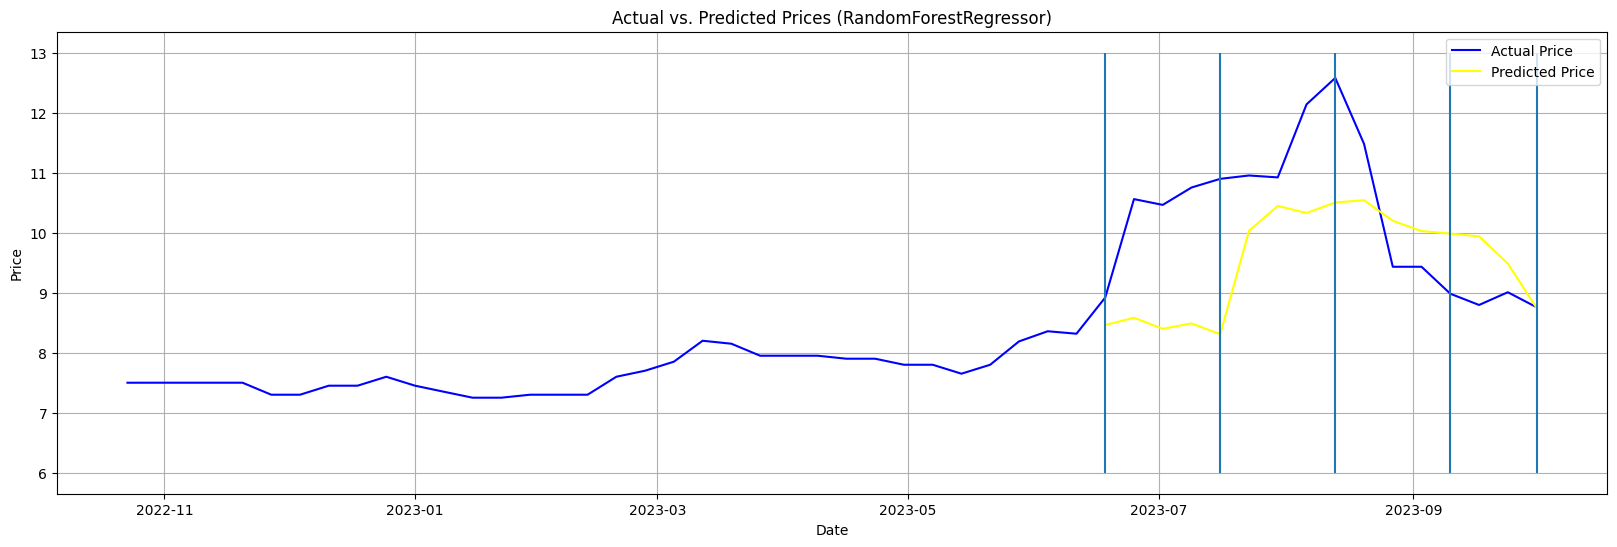

In [38]:
plot_actual_vs_predicted(actual_df_yellow, RandomForestRegressor_outcome_yellow_all, 'yellow',6 ,13, 'RandomForestRegressor' )

##3) SVR

In [39]:
SVR_model_red = process_model_data(model_data_red, 'SVR')
SVR_model_green = process_model_data(model_data_green, 'SVR')
SVR_model_yellow= process_model_data(model_data_yellow, 'SVR')

In [40]:
SVR_model_red['mae'].mean()

0.6100996100456575

In [41]:
SVR_model_green['mae'].mean()

0.46150736354759064

In [42]:
SVR_model_yellow['mae'].mean()

1.4909934163531882

In [43]:
df_SVR_red = process_weekly_data(SVR_model_red, week_dt, 'SVR' )
df_SVR_green = process_weekly_data(SVR_model_green, week_dt, 'SVR' )
df_SVR_yellow = process_weekly_data(SVR_model_yellow, week_dt, 'SVR' )

In [44]:
SVR_outcome_red_all= process_outcome_data(df_SVR_red, week_dt)
SVR_outcome_green_all= process_outcome_data(df_SVR_green, week_dt)
SVR_outcome_yellow_all= process_outcome_data(df_SVR_yellow, week_dt)

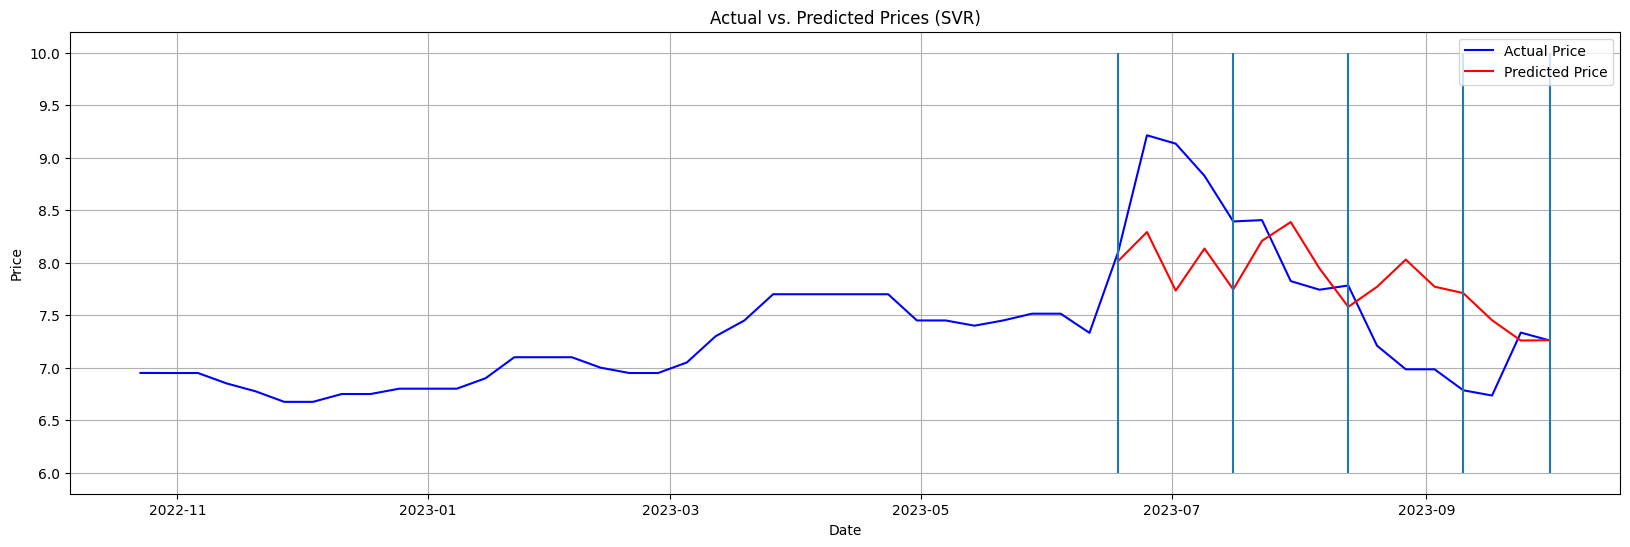

In [45]:
plot_actual_vs_predicted(actual_df_red, SVR_outcome_red_all, 'red', 6, 10, 'SVR' )

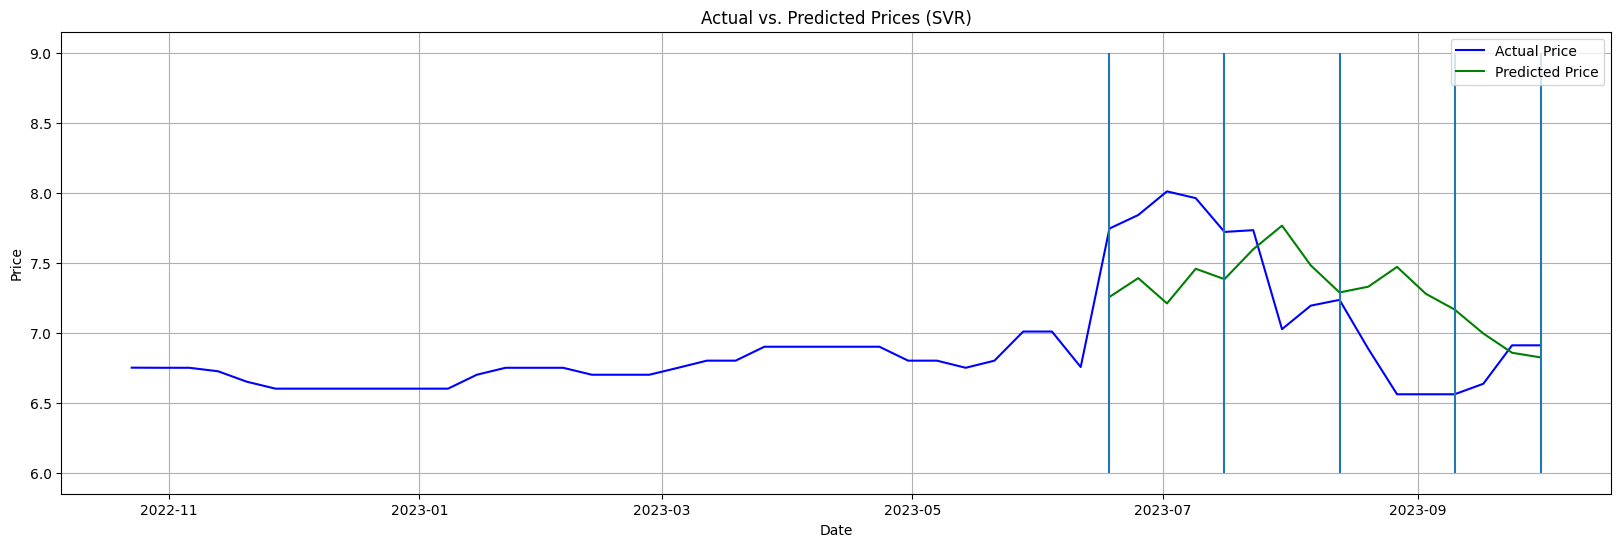

In [46]:
plot_actual_vs_predicted(actual_df_green, SVR_outcome_green_all, 'green',6 ,9, 'SVR' )

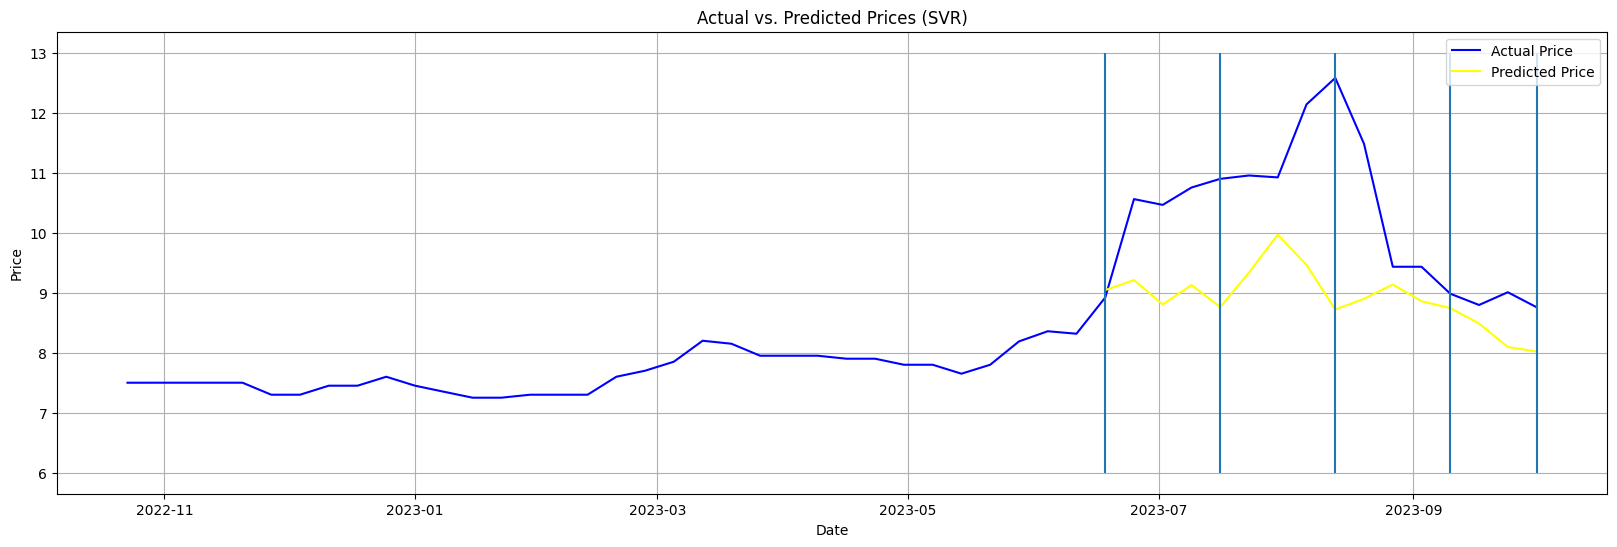

In [47]:
plot_actual_vs_predicted(actual_df_yellow, SVR_outcome_yellow_all, 'yellow',6 ,13, 'SVR' )

##4) LinearRegression

In [48]:
LinearRegression_model_red = process_model_data(model_data_red, 'LinearRegression')
LinearRegression_model_green = process_model_data(model_data_green, 'LinearRegression')
LinearRegression_model_yellow= process_model_data(model_data_yellow, 'LinearRegression')

In [49]:
LinearRegression_model_red['mae'].mean()

0.5897789354925358

In [50]:
LinearRegression_model_green['mae'].mean()

0.4445548170405875

In [51]:
LinearRegression_model_yellow['mae'].mean()

1.3754202557216786

In [52]:
df_LinearRegression_red = process_weekly_data(LinearRegression_model_red, week_dt, 'LinearRegression' )
df_LinearRegression_green = process_weekly_data(LinearRegression_model_green, week_dt, 'LinearRegression' )
df_LinearRegression_yellow = process_weekly_data(LinearRegression_model_yellow, week_dt, 'LinearRegression' )

In [53]:
LinearRegression_outcome_red_all= process_outcome_data(df_LinearRegression_red, week_dt)
LinearRegression_outcome_green_all= process_outcome_data(df_LinearRegression_green, week_dt)
LinearRegression_outcome_yellow_all= process_outcome_data(df_LinearRegression_yellow, week_dt)

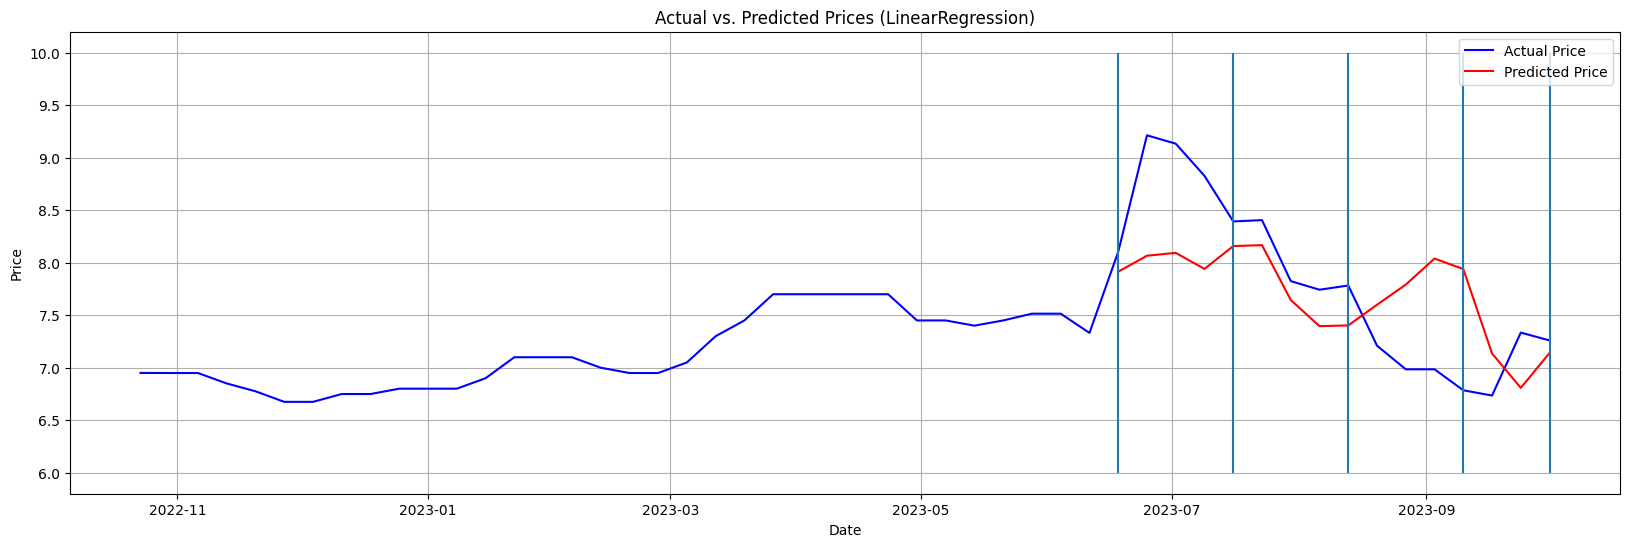

In [54]:
plot_actual_vs_predicted(actual_df_red, LinearRegression_outcome_red_all, 'red', 6, 10, 'LinearRegression' )

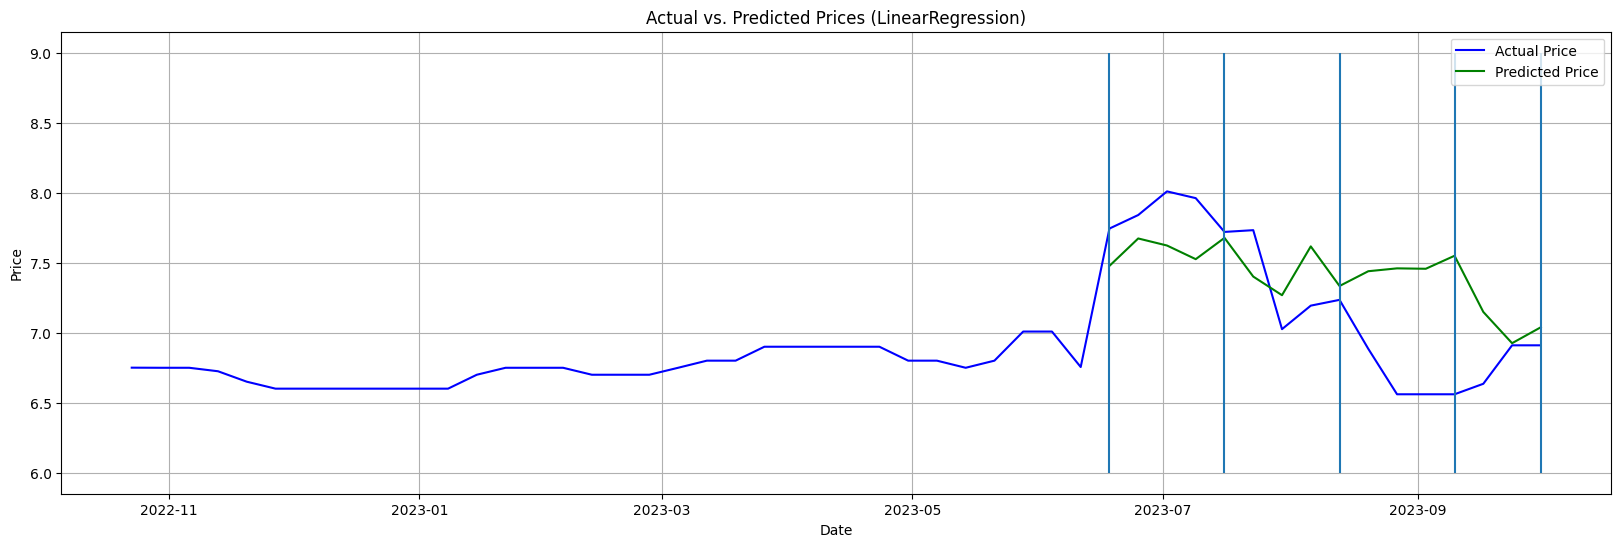

In [55]:
plot_actual_vs_predicted(actual_df_green, LinearRegression_outcome_green_all, 'green',6 ,9, 'LinearRegression' )

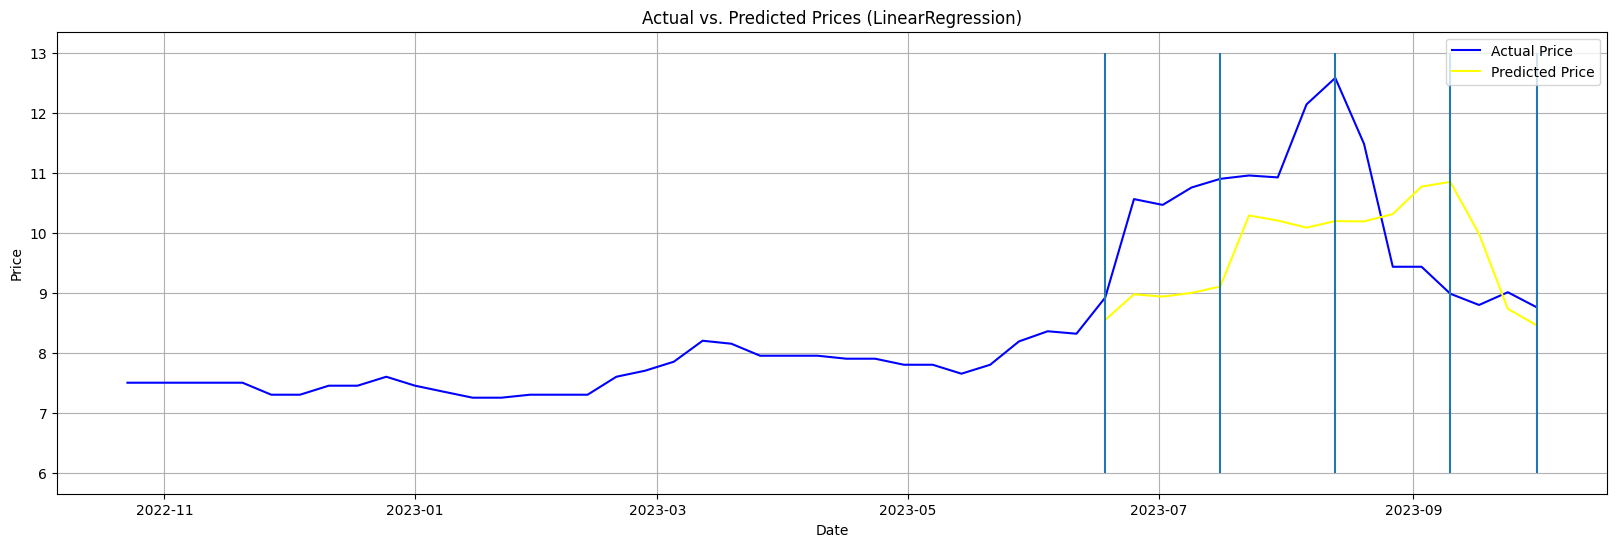

In [56]:
plot_actual_vs_predicted(actual_df_yellow, LinearRegression_outcome_yellow_all, 'yellow',6 ,13, 'LinearRegression' )

##5) XGBRegressor

In [57]:
XGBRegressor_model_red = process_model_data(model_data_red, 'XGBRegressor')
XGBRegressor_model_green = process_model_data(model_data_green, 'XGBRegressor')
XGBRegressor_model_yellow= process_model_data(model_data_yellow, 'XGBRegressor')

In [58]:
XGBRegressor_model_red['mae'].mean()

0.48611141740394015

In [59]:
XGBRegressor_model_green['mae'].mean()

0.47459321533367455

In [60]:
XGBRegressor_model_yellow['mae'].mean()

1.3498021869458714

In [61]:
df_XGBRegressor_red = process_weekly_data(XGBRegressor_model_red, week_dt, 'XGBRegressor' )
df_XGBRegressor_green = process_weekly_data(XGBRegressor_model_green, week_dt, 'XGBRegressor' )
df_XGBRegressor_yellow = process_weekly_data(XGBRegressor_model_yellow, week_dt, 'XGBRegressor' )

In [62]:
XGBRegressor_outcome_red_all= process_outcome_data(df_XGBRegressor_red, week_dt)
XGBRegressor_outcome_green_all= process_outcome_data(df_XGBRegressor_green, week_dt)
XGBRegressor_outcome_yellow_all= process_outcome_data(df_XGBRegressor_yellow, week_dt)

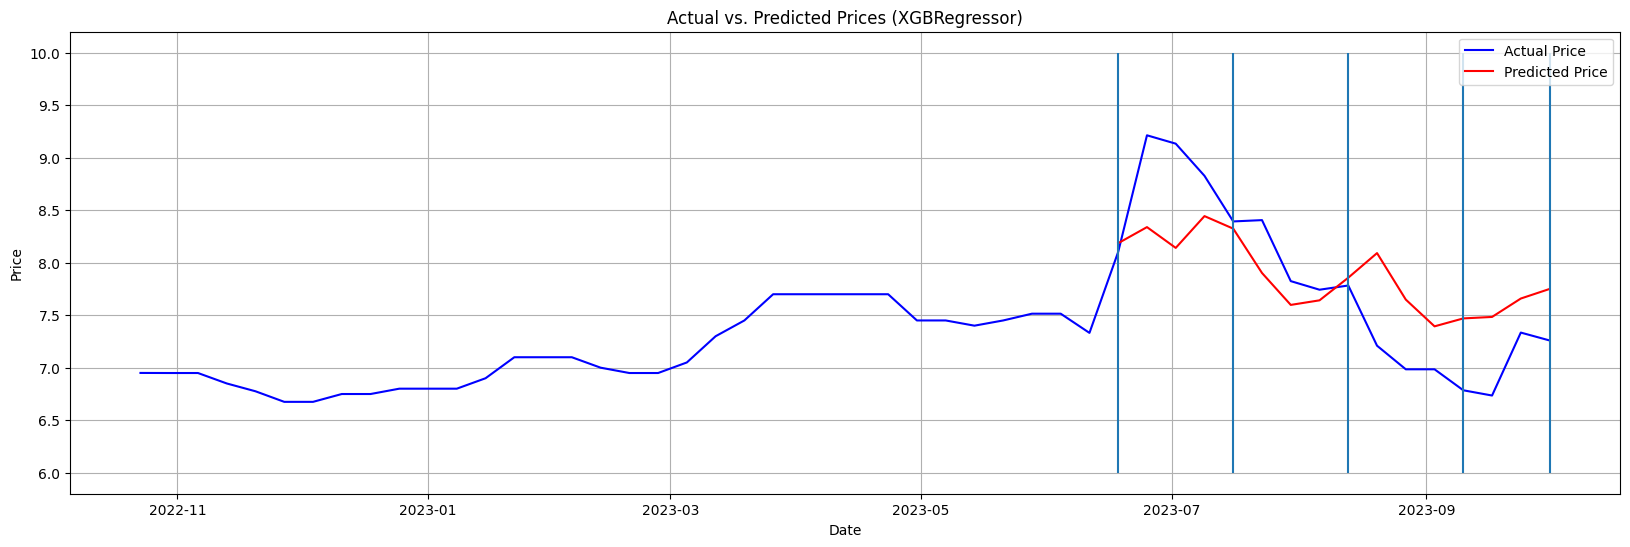

In [63]:
plot_actual_vs_predicted(actual_df_red, XGBRegressor_outcome_red_all, 'red', 6, 10, 'XGBRegressor' )

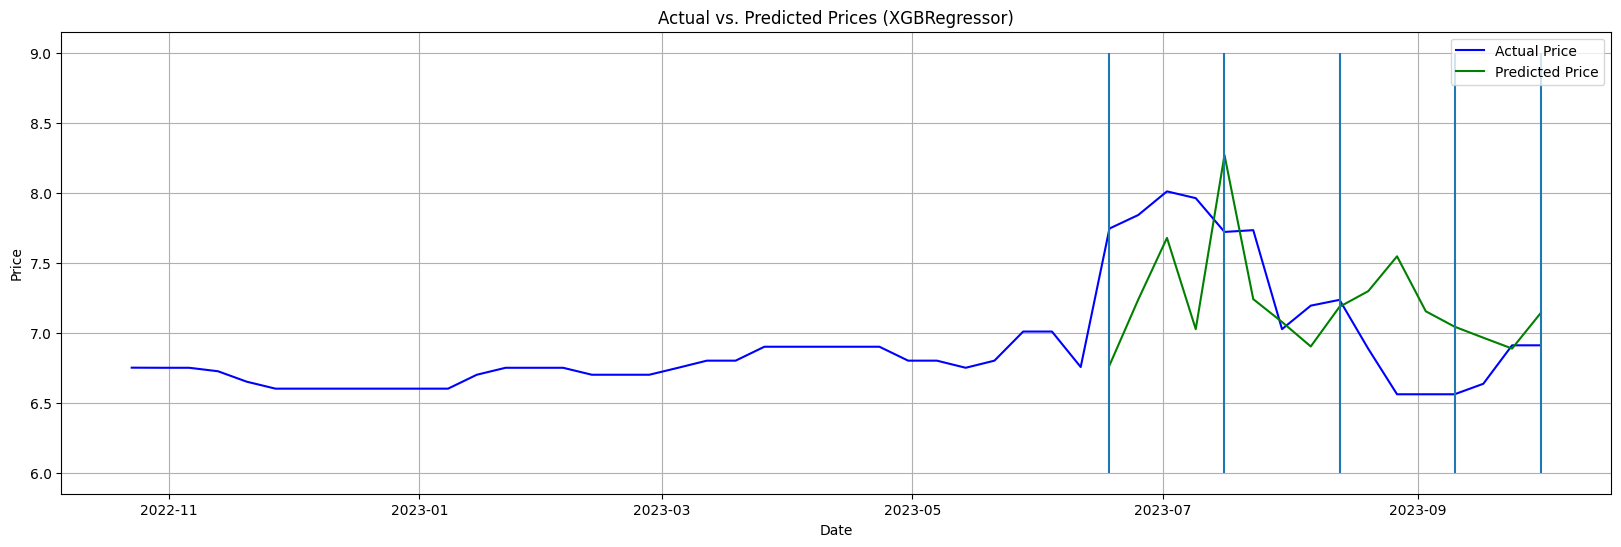

In [64]:
plot_actual_vs_predicted(actual_df_green, XGBRegressor_outcome_green_all, 'green',6 ,9, 'XGBRegressor' )

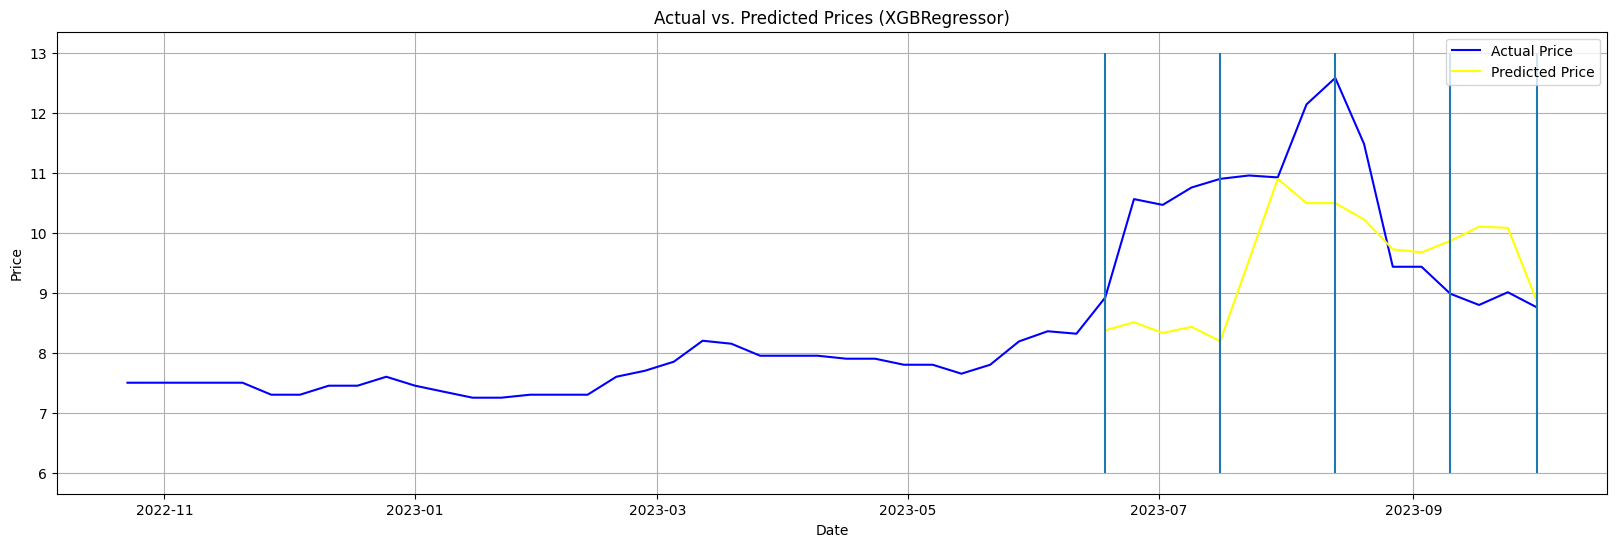

In [65]:
plot_actual_vs_predicted(actual_df_yellow, XGBRegressor_outcome_yellow_all, 'yellow',6 ,13, 'XGBRegressor' )

##6) XGBRFRegressor

In [66]:
XGBRFRegressor_model_red = process_model_data(model_data_red, 'XGBRFRegressor')
XGBRFRegressor_model_green = process_model_data(model_data_green, 'XGBRFRegressor')
XGBRFRegressor_model_yellow= process_model_data(model_data_yellow, 'XGBRFRegressor')

In [67]:
XGBRFRegressor_model_red['mae'].mean()

0.6368484838333129

In [68]:
XGBRFRegressor_model_green['mae'].mean()

0.5238281069432187

In [69]:
XGBRFRegressor_model_yellow['mae'].mean()

1.3156700889448902

In [70]:
df_XGBRFRegressor_red = process_weekly_data(XGBRFRegressor_model_red, week_dt, 'XGBRFRegressor' )
df_XGBRFRegressor_green = process_weekly_data(XGBRFRegressor_model_green, week_dt, 'XGBRFRegressor' )
df_XGBRFRegressor_yellow = process_weekly_data(XGBRFRegressor_model_yellow, week_dt, 'XGBRFRegressor' )

In [71]:
XGBRFRegressor_outcome_red_all= process_outcome_data(df_XGBRFRegressor_red, week_dt)
XGBRFRegressor_outcome_green_all= process_outcome_data(df_XGBRFRegressor_green, week_dt)
XGBRFRegressor_outcome_yellow_all= process_outcome_data(df_XGBRFRegressor_yellow, week_dt)

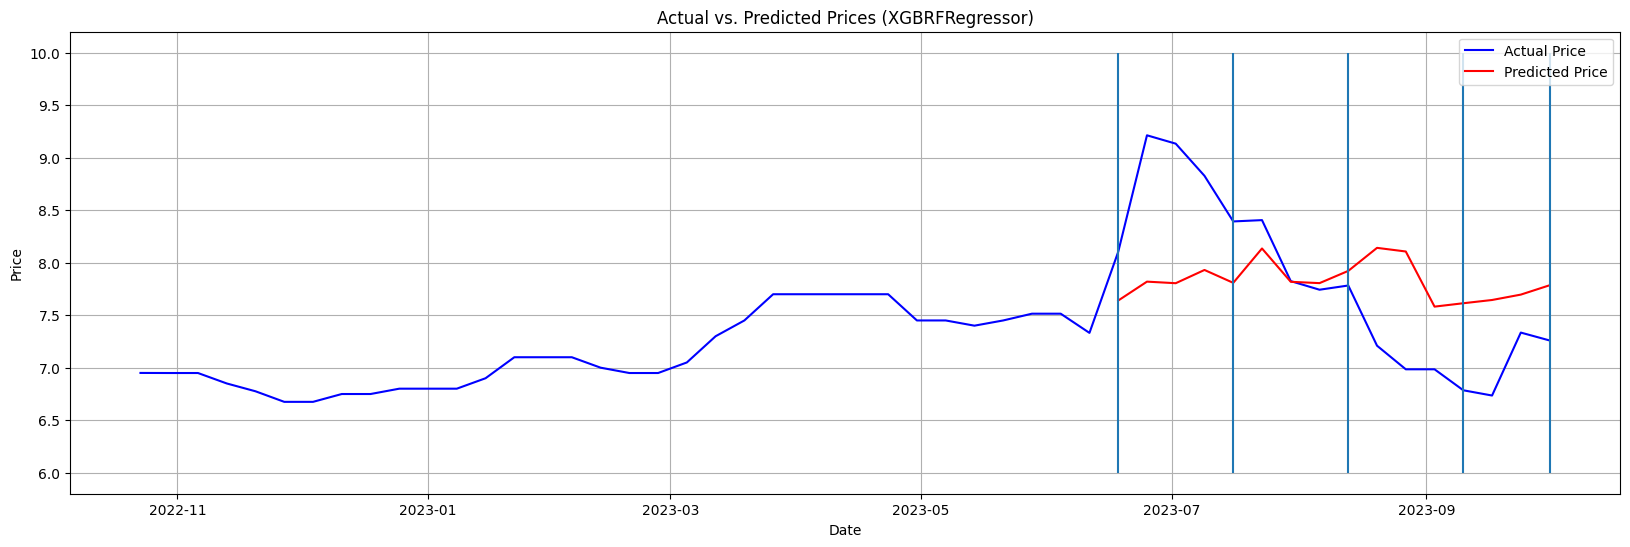

In [72]:
plot_actual_vs_predicted(actual_df_red, XGBRFRegressor_outcome_red_all, 'red', 6, 10, 'XGBRFRegressor' )

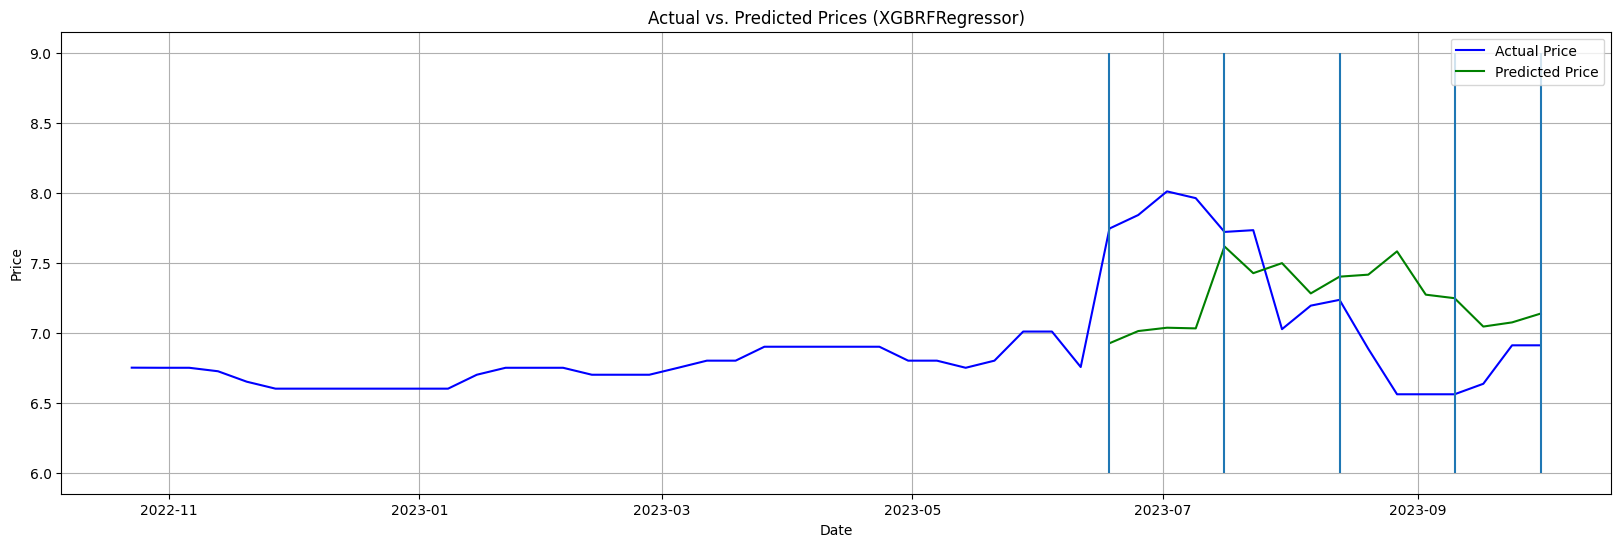

In [73]:
plot_actual_vs_predicted(actual_df_green, XGBRFRegressor_outcome_green_all, 'green',6 ,9, 'XGBRFRegressor' )

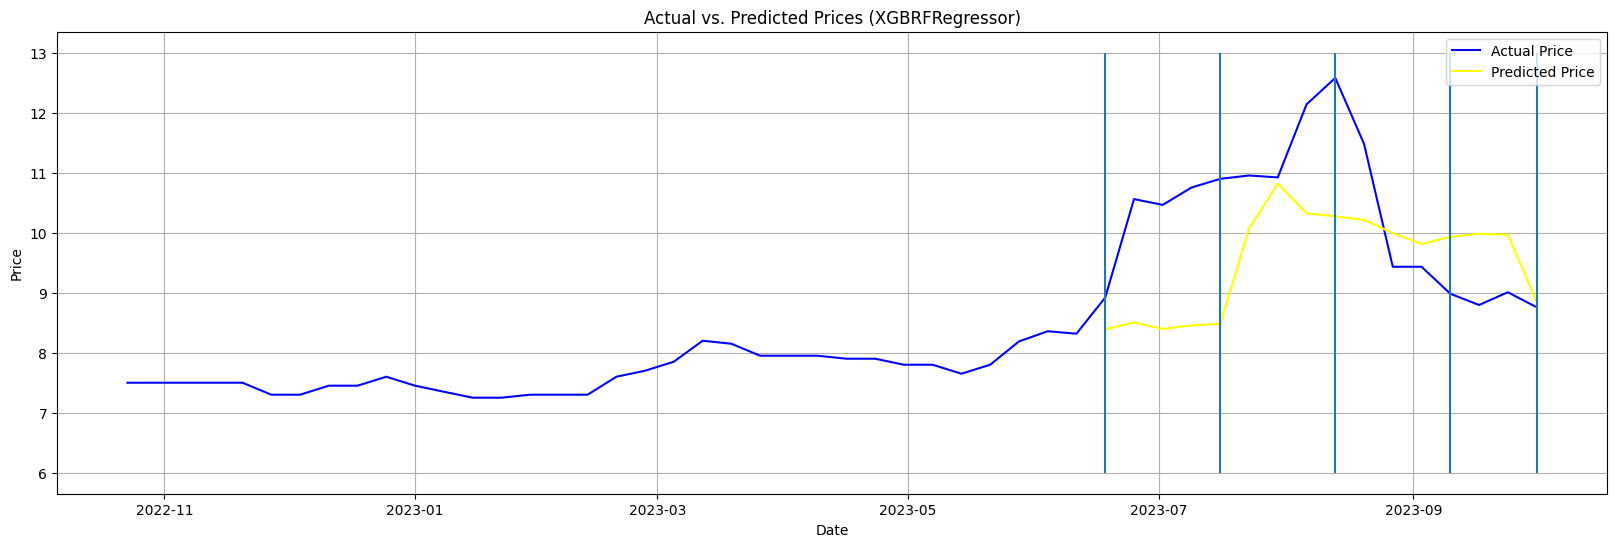

In [74]:
plot_actual_vs_predicted(actual_df_yellow, XGBRFRegressor_outcome_yellow_all, 'yellow',6 ,13, 'XGBRFRegressor' )

##7) AdaBoostRegressor

In [75]:
AdaBoostRegressor_model_red = process_model_data(model_data_red, 'AdaBoostRegressor')
AdaBoostRegressor_model_green = process_model_data(model_data_green, 'AdaBoostRegressor')
AdaBoostRegressor_model_yellow= process_model_data(model_data_yellow, 'AdaBoostRegressor')

In [76]:
AdaBoostRegressor_model_red['mae'].mean()

0.7449652904575306

In [77]:
AdaBoostRegressor_model_green['mae'].mean()

0.6701279130070847

In [78]:
AdaBoostRegressor_model_yellow['mae'].mean()

1.3246443923443476

In [79]:
df_AdaBoostRegressor_red = process_weekly_data(AdaBoostRegressor_model_red, week_dt, 'AdaBoostRegressor' )
df_AdaBoostRegressor_green = process_weekly_data(AdaBoostRegressor_model_green, week_dt, 'AdaBoostRegressor' )
df_AdaBoostRegressor_yellow = process_weekly_data(AdaBoostRegressor_model_yellow, week_dt, 'AdaBoostRegressor' )

In [80]:
AdaBoostRegressor_outcome_red_all= process_outcome_data(df_AdaBoostRegressor_red, week_dt)
AdaBoostRegressor_outcome_green_all= process_outcome_data(df_AdaBoostRegressor_green, week_dt)
AdaBoostRegressor_outcome_yellow_all= process_outcome_data(df_AdaBoostRegressor_yellow, week_dt)

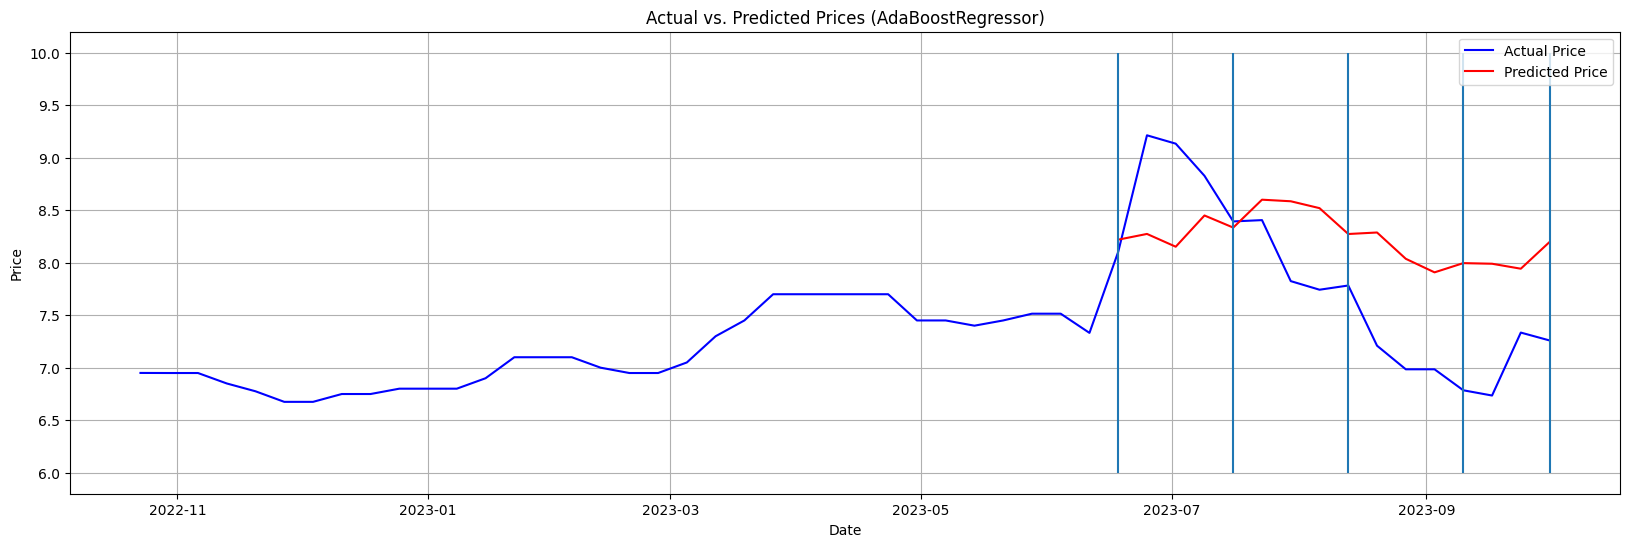

In [81]:
plot_actual_vs_predicted(actual_df_red, AdaBoostRegressor_outcome_red_all, 'red', 6, 10, 'AdaBoostRegressor' )

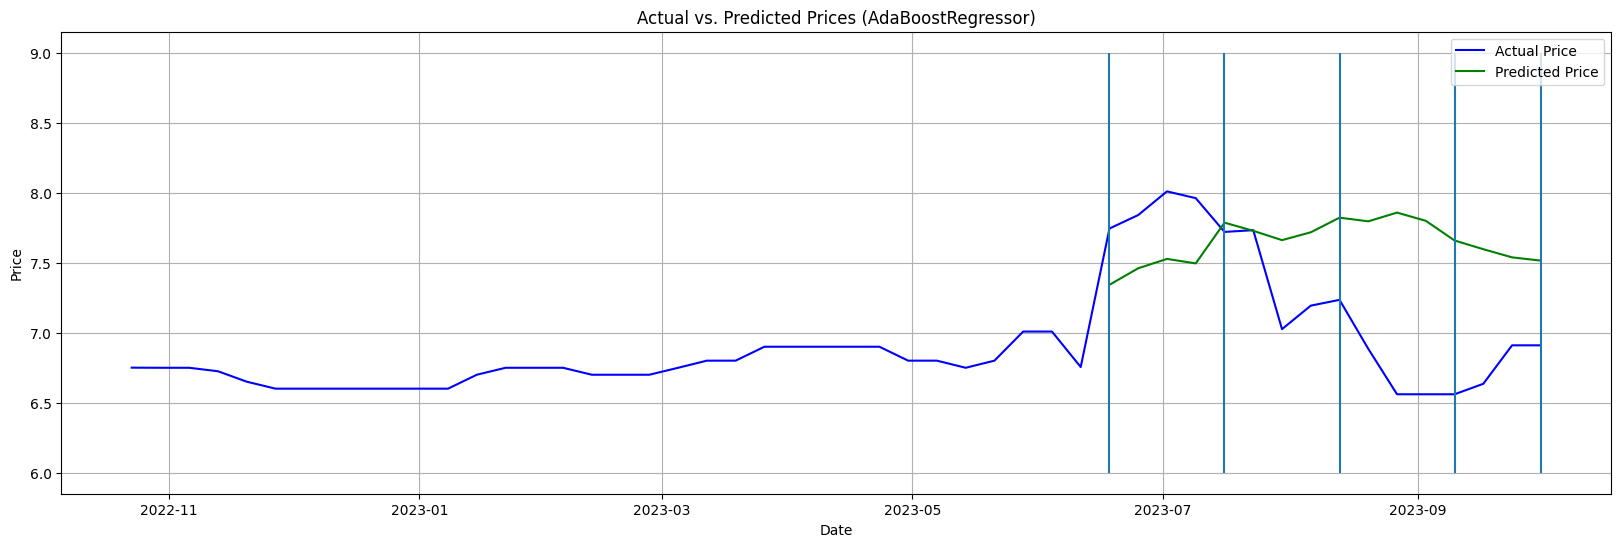

In [82]:
plot_actual_vs_predicted(actual_df_green, AdaBoostRegressor_outcome_green_all, 'green',6 ,9, 'AdaBoostRegressor' )

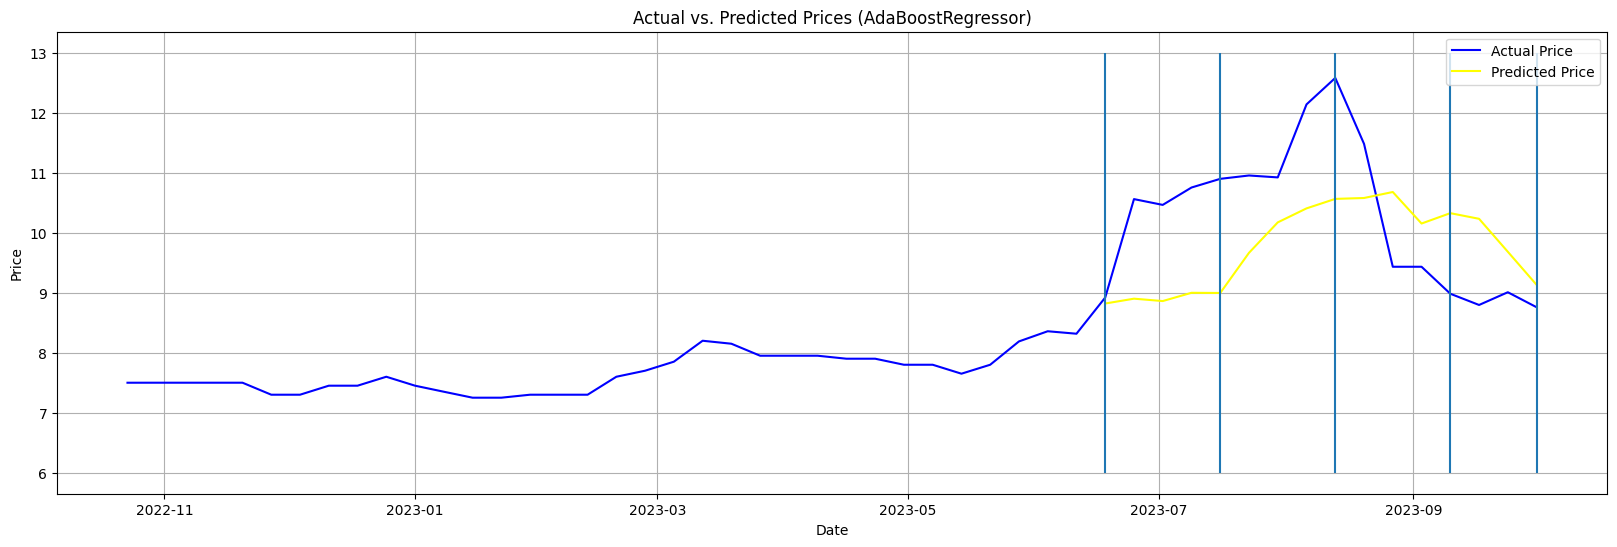

In [83]:
plot_actual_vs_predicted(actual_df_yellow, AdaBoostRegressor_outcome_yellow_all, 'yellow',6 ,13, 'AdaBoostRegressor' )

##8) LGBMRegressor

In [84]:
LGBMRegressor_model_red = process_model_data(model_data_red, 'LGBMRegressor')
LGBMRegressor_model_green = process_model_data(model_data_green, 'LGBMRegressor')
LGBMRegressor_model_yellow= process_model_data(model_data_yellow, 'LGBMRegressor')

In [85]:
LGBMRegressor_model_red['mae'].mean()

0.4534644350053145

In [86]:
LGBMRegressor_model_green['mae'].mean()

0.48943357677641497

In [87]:
LGBMRegressor_model_yellow['mae'].mean()

1.2576370700047463

In [88]:
df_LGBMRegressor_red = process_weekly_data(LGBMRegressor_model_red, week_dt, 'LGBMRegressor' )
df_LGBMRegressor_green = process_weekly_data(LGBMRegressor_model_green, week_dt, 'LGBMRegressor' )
df_LGBMRegressor_yellow = process_weekly_data(LGBMRegressor_model_yellow, week_dt, 'LGBMRegressor' )

In [89]:
LGBMRegressor_outcome_red_all= process_outcome_data(df_LGBMRegressor_red, week_dt)
LGBMRegressor_outcome_green_all= process_outcome_data(df_LGBMRegressor_green, week_dt)
LGBMRegressor_outcome_yellow_all= process_outcome_data(df_LGBMRegressor_yellow, week_dt)

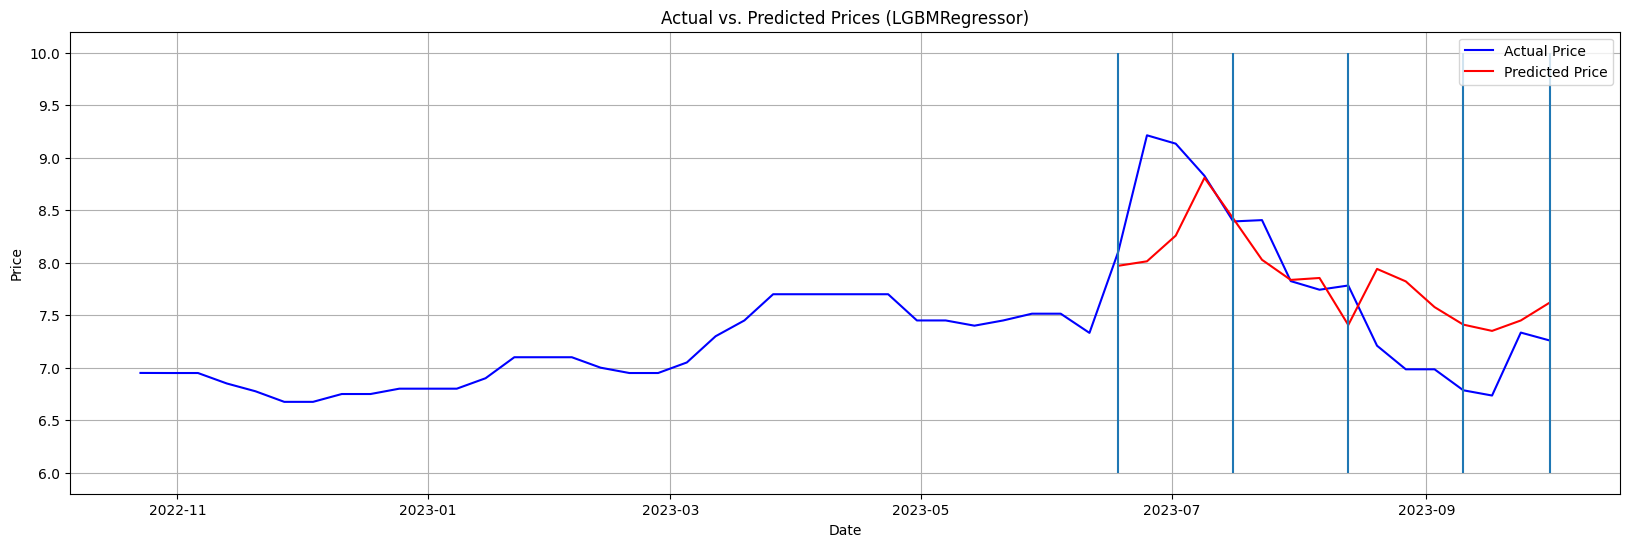

In [90]:
plot_actual_vs_predicted(actual_df_red, LGBMRegressor_outcome_red_all, 'red', 6, 10, 'LGBMRegressor' )

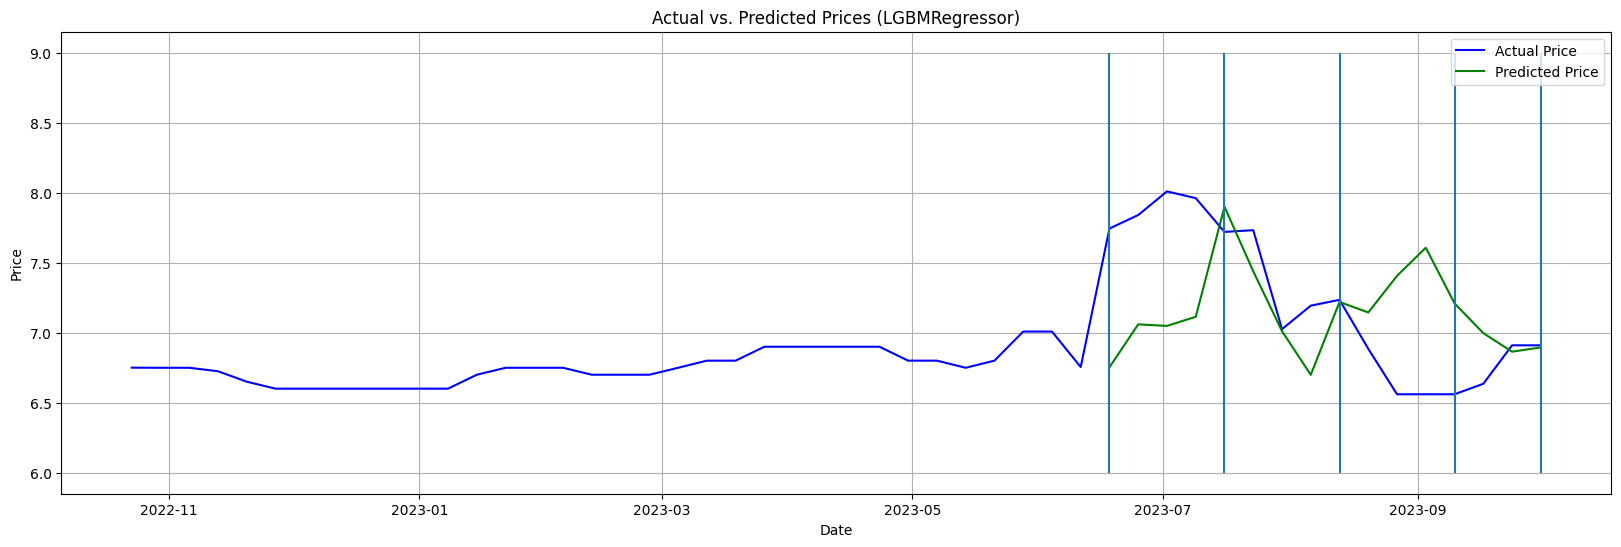

In [91]:
plot_actual_vs_predicted(actual_df_green, LGBMRegressor_outcome_green_all, 'green',6 ,9, 'LGBMRegressor' )

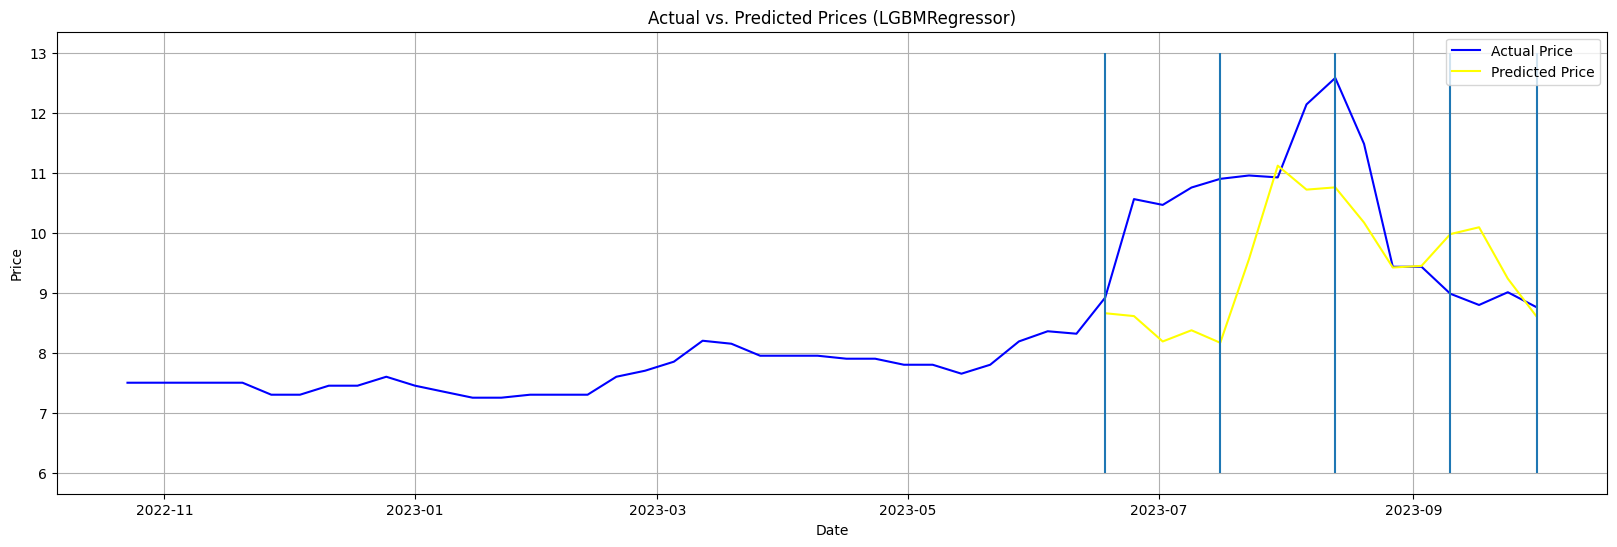

In [92]:
plot_actual_vs_predicted(actual_df_yellow, LGBMRegressor_outcome_yellow_all, 'yellow',6 ,13, 'LGBMRegressor' )

##9) CatBoostRegressor

In [93]:
CatBoostRegressor_model_red = process_model_data(model_data_red, 'CatBoostRegressor')
CatBoostRegressor_model_green = process_model_data(model_data_green, 'CatBoostRegressor')
CatBoostRegressor_model_yellow= process_model_data(model_data_yellow, 'CatBoostRegressor')

In [94]:
CatBoostRegressor_model_red['mae'].mean()

0.5019152793326817

In [95]:
CatBoostRegressor_model_green['mae'].mean()

0.4488461064457353

In [96]:
CatBoostRegressor_model_yellow['mae'].mean()

1.3273296421305985

In [97]:
df_CatBoostRegressor_red = process_weekly_data(CatBoostRegressor_model_red, week_dt, 'CatBoostRegressor' )
df_CatBoostRegressor_green = process_weekly_data(CatBoostRegressor_model_green, week_dt, 'CatBoostRegressor' )
df_CatBoostRegressor_yellow = process_weekly_data(CatBoostRegressor_model_yellow, week_dt, 'CatBoostRegressor' )

In [98]:
CatBoostRegressor_outcome_red_all= process_outcome_data(df_CatBoostRegressor_red, week_dt)
CatBoostRegressor_outcome_green_all= process_outcome_data(df_CatBoostRegressor_green, week_dt)
CatBoostRegressor_outcome_yellow_all= process_outcome_data(df_CatBoostRegressor_yellow, week_dt)

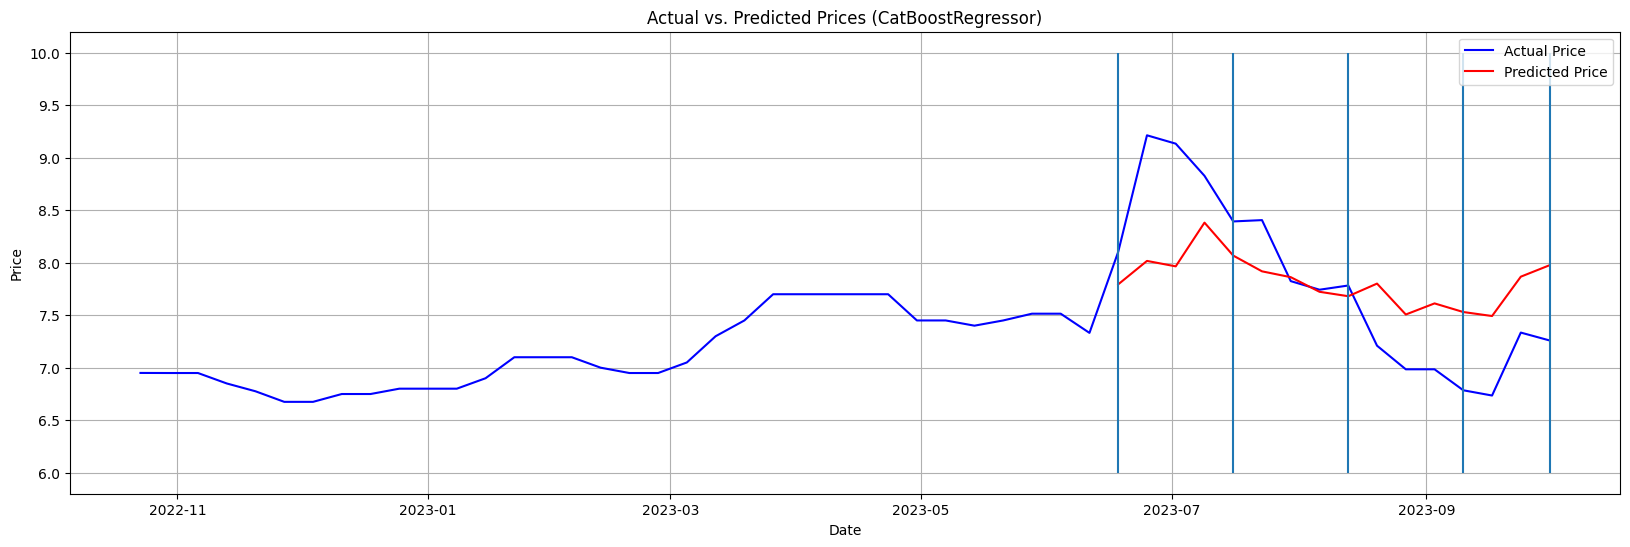

In [99]:
plot_actual_vs_predicted(actual_df_red, CatBoostRegressor_outcome_red_all, 'red', 6, 10, 'CatBoostRegressor' )

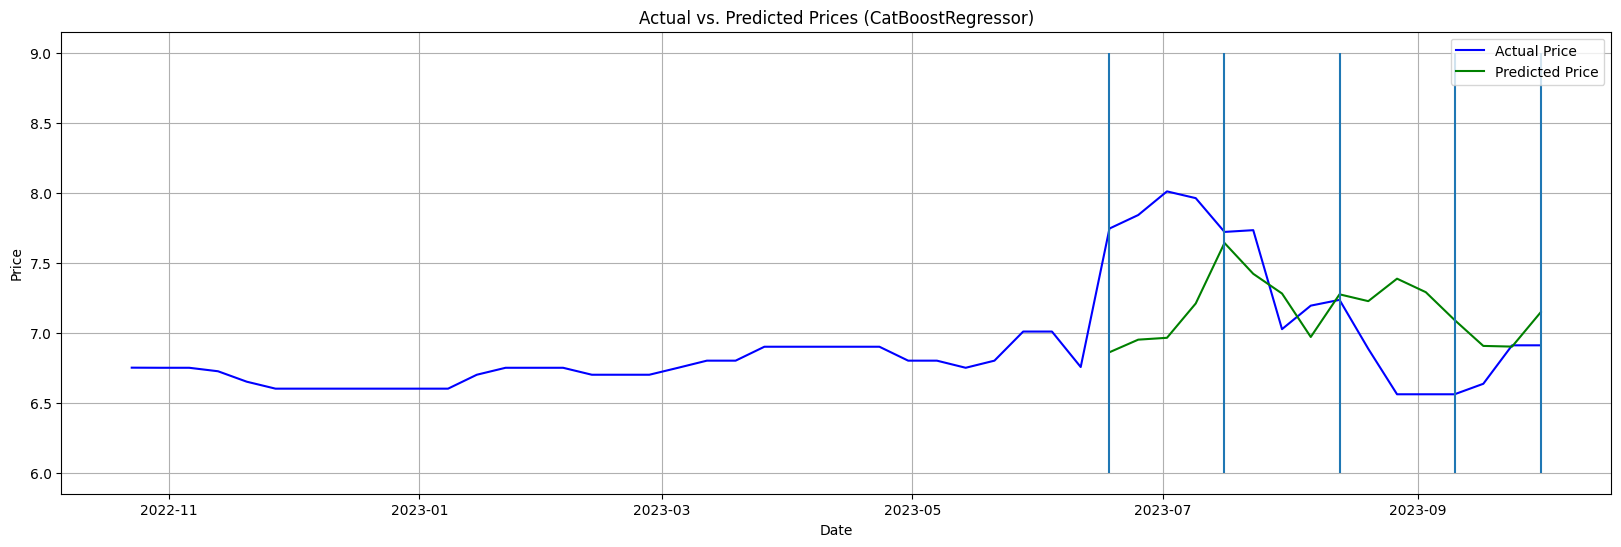

In [100]:
plot_actual_vs_predicted(actual_df_green, CatBoostRegressor_outcome_green_all, 'green',6 ,9, 'CatBoostRegressor' )

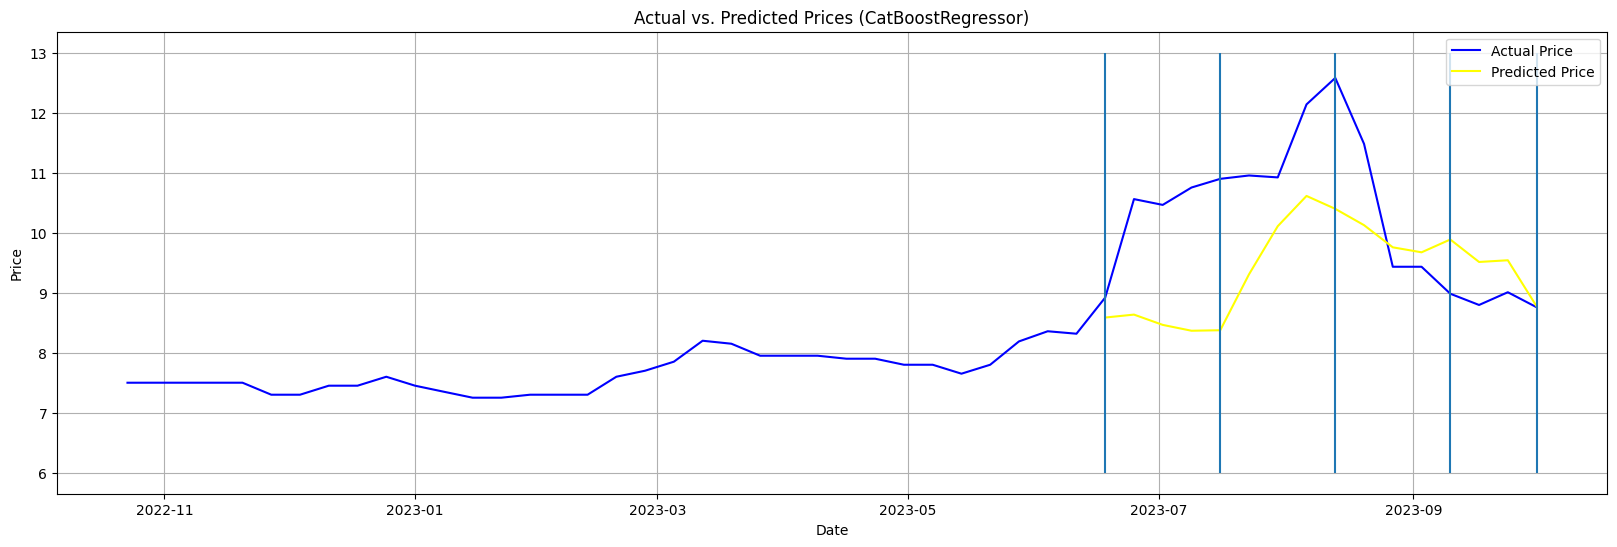

In [101]:
plot_actual_vs_predicted(actual_df_yellow, CatBoostRegressor_outcome_yellow_all, 'yellow',6 ,13, 'CatBoostRegressor' )

##Hyperparamers tunning

try to make Hyperparamers tunning on XGBRegressor

In [102]:
from hyperopt import fmin,tpe,STATUS_OK,Trials,hp

In [103]:
np.random.seed(42)

In [104]:
space_red = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'eta'      : hp.uniform("eta", 0, 2),
    'gamma'    : hp.uniform("gamma", 0, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

In [105]:
space_green = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'eta'      : hp.uniform("eta", 0, 2),
    'gamma'    : hp.uniform("gamma", 0, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.1), np.log(1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

In [106]:
space_yellow = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'eta'      : hp.uniform("eta", 0, 2),
    'gamma'    : hp.uniform("gamma", 0, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.1), np.log(1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bynode': hp.uniform("colsample_bynode", 0.5,1),
    'colsample_bylevel': hp.uniform("colsample_bylevel", 0.5,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
}

In [107]:

def hyperopt_tuning(data_frame, space, model, n_train, forecast_horizon):
  def objective(space):
    for i in range(n_train, len(data_frame) - forecast_horizon + 1):
      # Split the data into the training set and test set for each window
      train_data = data_frame[i - n_train:i]
      test_data = data_frame[i:i + forecast_horizon]

      X_train= train_data.drop('price', axis= 1)
      y_train= train_data['price']

      X_test= test_data.drop('price', axis= 1)
      y_test= test_data['price']


      model_opt = model(max_depth=int(space['max_depth']),
                              subsample= float(space['subsample']),
                              learning_rate= float(space['learning_rate']),
                              eta=float(space['eta']),
                              gamma=float(space['gamma']),
                              colsample_bynode=float(space['colsample_bynode']),
                              colsample_bylevel=float(space['colsample_bylevel']),
                              colsample_bytree=float(space['colsample_bytree']),
                              n_estimators=int(space['n_estimators']),
                              )
      mae_results = []
      model_opt.fit(X_train, y_train)
      y_pred= model_opt.predict(X_test)
      mae = mean_absolute_error(y_test, y_pred)

      mae_results.append(mae)
      mean_mae= np.mean(mae_results)

      return {
              'loss': mean_mae,
              'status': STATUS_OK
              }

  trials = Trials()
  best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials= trials )

  return best

In [108]:
best_hyperparameters_red= hyperopt_tuning(df_red_12feat, space_red, XGBRegressor, n_train, forecast_horizon)
best_hyperparameters_green= hyperopt_tuning(df_green_12feat, space_green, XGBRegressor, n_train, forecast_horizon)
best_hyperparameters_yellow= hyperopt_tuning(df_yellow_12feat, space_yellow, XGBRegressor, n_train, forecast_horizon)


100%|██████████| 200/200 [00:41<00:00,  4.85trial/s, best loss: 1.0795328222656249]


In [109]:
print(best_hyperparameters_red)

{'colsample_bylevel': 0.8751376622940507, 'colsample_bynode': 0.9857632361195282, 'colsample_bytree': 0.6275342451958622, 'eta': 0.9462321900002146, 'gamma': 0.34446753187116663, 'learning_rate': 0.38259535918205084, 'max_depth': 7.0, 'min_child_weight': 7.0, 'n_estimators': 640.0, 'subsample': 0.6529331587012734}


In [110]:
print(best_hyperparameters_green)

{'colsample_bylevel': 0.9251600971768997, 'colsample_bynode': 0.9677065430738333, 'colsample_bytree': 0.9981284474590364, 'eta': 1.922147417942199, 'gamma': 0.6174871501779322, 'learning_rate': 0.8709037786383867, 'max_depth': 10.0, 'min_child_weight': 3.0, 'n_estimators': 32.0, 'subsample': 0.7042903528813949}


In [111]:
print(best_hyperparameters_yellow)

{'colsample_bylevel': 0.897711698015621, 'colsample_bynode': 0.8109561553423491, 'colsample_bytree': 0.9474825552061262, 'eta': 1.217643335329134, 'gamma': 0.43006658020997424, 'learning_rate': 0.9011519554408952, 'max_depth': 19.0, 'min_child_weight': 7.0, 'n_estimators': 354.0, 'subsample': 0.658240296890645}


In [112]:

def hyperopt_tuning_best(data_frame, model_name, model, best_hyperparameters, n_train, forecast_horizon):

  mae_results = []
  model_data = []


  for i in range(n_train, len(data_frame) - forecast_horizon + 1):
    # Split the data into the training set and test set for each window
    train_data = data_frame[i - n_train:i]
    test_data = data_frame[i:i + forecast_horizon]

    X_train= train_data.drop('price', axis= 1)
    y_train= train_data['price']

    X_test= test_data.drop('price', axis= 1)
    y_test= test_data['price']


    best_model = model(max_depth=int(best_hyperparameters['max_depth']),
                            subsample= float(best_hyperparameters['subsample']),
                            learning_rate= float(best_hyperparameters['learning_rate']),
                            eta=float(best_hyperparameters['eta']),
                            gamma=float(best_hyperparameters['gamma']),
                            colsample_bynode=float(best_hyperparameters['colsample_bynode']),
                            colsample_bylevel=float(best_hyperparameters['colsample_bylevel']),
                            colsample_bytree=float(best_hyperparameters['colsample_bytree']),
                            n_estimators=int(best_hyperparameters['n_estimators']),
                            )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    mae_results.append(mae)
    row = {
                'window': i - n_train,
                'week_end_dt': y_test.index.values,
                'model_name': model_name,
                'mae': mae,
                'y_test': y_test.values,
                'y_pred': y_pred
            }

    model_data.append(row)
  return pd.DataFrame(model_data)

In [113]:
model_data_red_tuned= hyperopt_tuning_best(df_red_12feat, 'XGBRegressor', XGBRegressor,best_hyperparameters_red, n_train, forecast_horizon)
model_data_green_tuned= hyperopt_tuning_best(df_green_12feat, 'XGBRegressor', XGBRegressor,best_hyperparameters_green, n_train, forecast_horizon)
model_data_yellow_tuned= hyperopt_tuning_best(df_yellow_12feat, 'XGBRegressor', XGBRegressor,best_hyperparameters_yellow, n_train, forecast_horizon)

In [114]:
XGBRegressor_model_red_tuned = process_model_data(model_data_red_tuned, 'XGBRegressor')
XGBRegressor_model_green_tuned = process_model_data(model_data_green_tuned, 'XGBRegressor')
XGBRegressor_model_yellow_tuned= process_model_data(model_data_yellow_tuned, 'XGBRegressor')

In [115]:
XGBRegressor_model_red['mae'].mean()

0.48611141740394015

In [116]:
XGBRegressor_model_green['mae'].mean()

0.47459321533367455

In [117]:
XGBRegressor_model_yellow['mae'].mean()

1.3498021869458714

In [118]:
df_XGBRegressor_red_tuned = process_weekly_data(XGBRegressor_model_red_tuned, week_dt, 'XGBRegressor' )
df_XGBRegressor_green_tuned = process_weekly_data(XGBRegressor_model_green_tuned, week_dt, 'XGBRegressor' )
df_XGBRegressor_yellow_tuned = process_weekly_data(XGBRegressor_model_yellow_tuned, week_dt, 'XGBRegressor' )

In [119]:
XGBRegressor_tuned_outcome_red_all= process_outcome_data(df_XGBRegressor_red_tuned, week_dt)
XGBRegressor_tuned_outcome_green_all= process_outcome_data(df_XGBRegressor_green_tuned, week_dt)
XGBRegressor_tuned_outcome_yellow_all= process_outcome_data(df_XGBRegressor_yellow_tuned, week_dt)

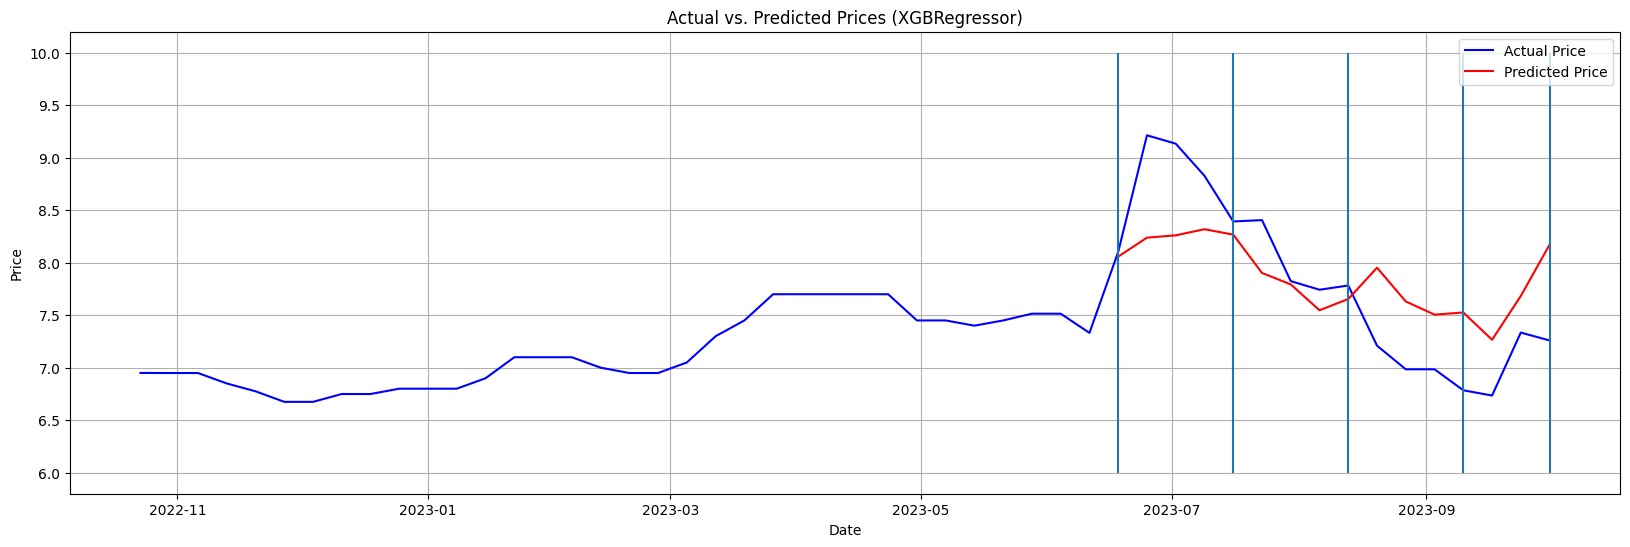

In [120]:
plot_actual_vs_predicted(actual_df_red, XGBRegressor_tuned_outcome_red_all, 'red', 6, 10, 'XGBRegressor' )

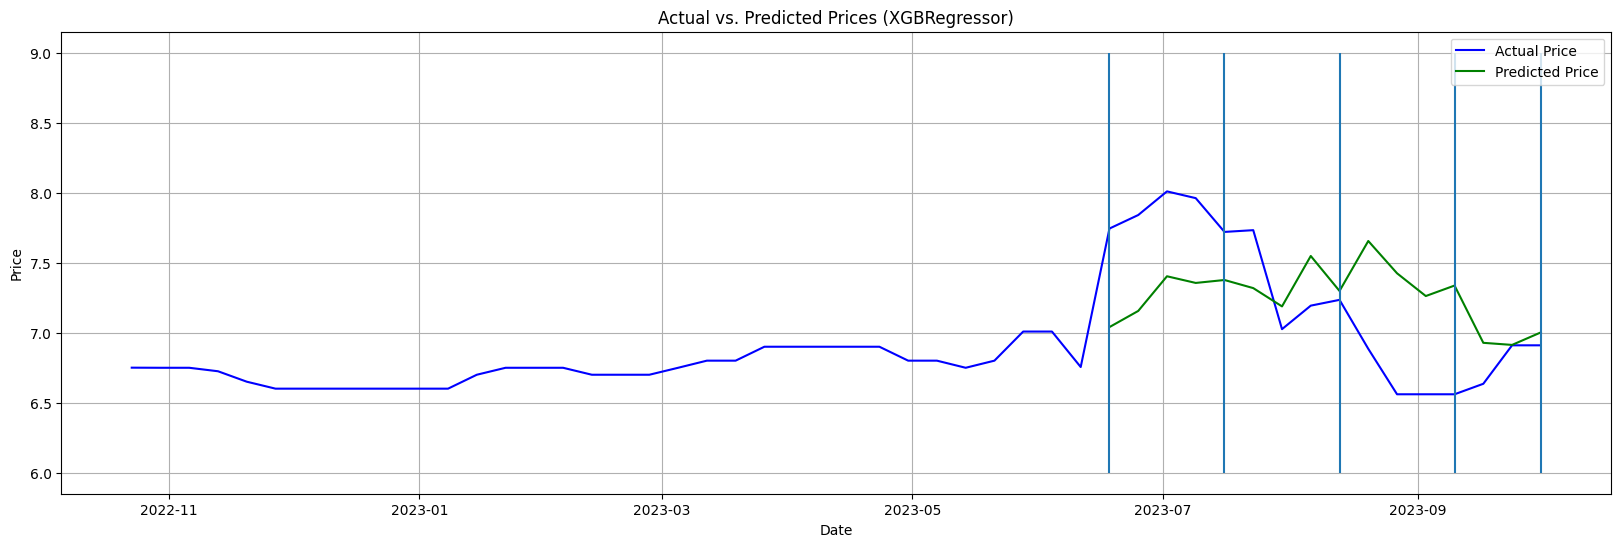

In [121]:
plot_actual_vs_predicted(actual_df_green, XGBRegressor_tuned_outcome_green_all, 'green',6 ,9, 'XGBRegressor' )

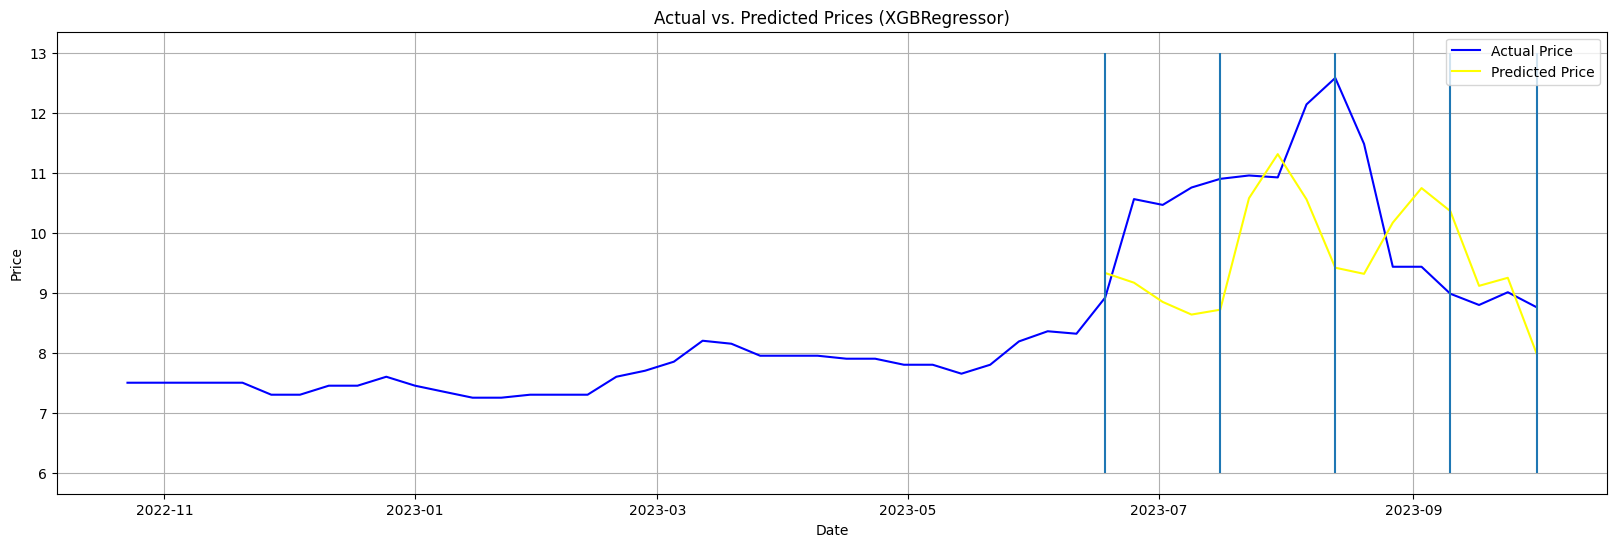

In [122]:
plot_actual_vs_predicted(actual_df_yellow, XGBRegressor_tuned_outcome_yellow_all, 'yellow',6 ,13, 'XGBRegressor' )

## Forcaste 4 weeks ahead

In [123]:
full_red_data=pd.read_csv('newr.csv')
full_green_data=pd.read_csv('newgreen.csv')
full_yellow_data=pd.read_csv('newyellow.csv')

split the data into train and test

In [124]:
full_red_data.set_index('week_end_dt', inplace= True)
full_green_data.set_index('week_end_dt', inplace= True)
full_yellow_data.set_index('week_end_dt', inplace= True)

In [125]:
X_red= full_red_data.drop('price', axis= 1)
y_red= full_red_data['price']

In [126]:
X_green= full_green_data.drop('price', axis= 1)
y_green= full_green_data['price']

In [127]:
X_yellow= full_yellow_data.drop('price', axis= 1)
y_yellow= full_yellow_data['price']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_red_train, X_red_test, y_red_train, y_red_test= train_test_split(X_red, y_red, train_size= 0.8, shuffle=False)
X_green_train, X_green_test, y_green_train, y_green_test= train_test_split(X_green, y_green, train_size= 0.8, shuffle=False)
X_yellow_train, X_yellow_test, y_yellow_train, y_yellow_test= train_test_split(X_yellow, y_yellow, train_size= 0.8, shuffle=False)

In [130]:
X_red_train.shape, y_red_train.shape, X_red_test.shape, y_red_test.shape

((321, 377), (321,), (81, 377), (81,))

In [131]:
best_model_red = XGBRegressor(max_depth=17,
                                     eta= 1.5190365874918106,
                                     gamma=0.2022230405729472,
                                     colsample_bytree=0.9730668274141201,
                                     subsample=0.9908323587184898,
                                     colsample_bylevel= 0.7577618320940855,
                                     colsample_bynode= 0.5588965032652575,
                                     learning_rate= 0.7392586556737816,
                                     min_child_weight= 7.0,
                                     n_estimators=573)


In [132]:
best_model_green = XGBRegressor(max_depth=10,
                                     eta= 0.46974423364199225,
                                     gamma=0.4852851996094185,
                                     colsample_bytree=0.7991862044143676,
                                     subsample=0.6551439525412549,
                                     colsample_bylevel= 0.8660048968980653,
                                     colsample_bynode= 0.773041160105922,
                                     learning_rate=  0.010288301338723965,
                                     min_child_weight= 5.0,
                                     n_estimators=887)


In [133]:
best_model_yellow = XGBRegressor(max_depth=18,
                                     eta= 0.371528514013678,
                                     gamma=0.8581615566471957,
                                     colsample_bytree= 0.7851559497428455,
                                     subsample=0.740963146241195,
                                     colsample_bylevel= 0.5065110295903711,
                                     colsample_bynode= 0.7187622259343914,
                                     learning_rate= 0.3,
                                     min_child_weight= 6,
                                     n_estimators=680)



In [134]:
best_model_red.fit(X_red_train, y_red_train)
y_red_pred = best_model_red.predict(X_red_test)
mae_red = mean_absolute_error(y_red_test, y_red_pred)

best_model_green.fit(X_green_train, y_green_train)
y_green_pred = best_model_green.predict(X_green_test)
mae_green = mean_absolute_error(y_green_test, y_green_pred)

best_model_yellow.fit(X_yellow_train, y_yellow_train)
y_yellow_pred = best_model_yellow.predict(X_yellow_test)
mae_yellow = mean_absolute_error(y_yellow_test, y_yellow_pred)

In [135]:
mae_red, mae_green, mae_yellow

(0.8975080461516203, 0.8596428862138911, 1.4606807036501284)

In [136]:
y_red_pred=pd.DataFrame(y_red_pred)
y_green_pred=pd.DataFrame(y_green_pred)
y_yellow_pred=pd.DataFrame(y_yellow_pred)


In [137]:
y_red_pred['week_end_dt'] =y_red_test.index
y_green_pred['week_end_dt'] =y_green_test.index
y_yellow_pred['week_end_dt'] =y_yellow_test.index

In [138]:
y_red_pred['week_end_dt']= pd.to_datetime(y_red_pred['week_end_dt'])
y_green_pred['week_end_dt']= pd.to_datetime(y_green_pred['week_end_dt'])
y_yellow_pred['week_end_dt']= pd.to_datetime(y_yellow_pred['week_end_dt'])

In [139]:
y_red_pred.set_index('week_end_dt', inplace= True)
y_green_pred.set_index('week_end_dt', inplace= True)
y_yellow_pred.set_index('week_end_dt', inplace= True)

In [140]:
actual_red= pd.DataFrame(y_red_test[-50:-4])
actual_green= pd.DataFrame(y_green_test[-50:-4])
actual_yellow= pd.DataFrame(y_yellow_test[-50:-4])


In [141]:
actual_red.reset_index(inplace= True)
actual_green.reset_index(inplace= True)
actual_yellow.reset_index(inplace= True)

In [142]:
actual_red['week_end_dt']= pd.to_datetime(actual_red['week_end_dt'])
actual_green['week_end_dt']= pd.to_datetime(actual_green['week_end_dt'])
actual_yellow['week_end_dt']= pd.to_datetime(actual_yellow['week_end_dt'])

In [143]:
actual_red.set_index('week_end_dt', inplace= True)
actual_green.set_index('week_end_dt', inplace= True)
actual_yellow.set_index('week_end_dt', inplace= True)

In [144]:
predicted_red= y_red_pred[-20:]
predicted_green= y_green_pred[-20:]
predicted_yellow= y_yellow_pred[-20:]

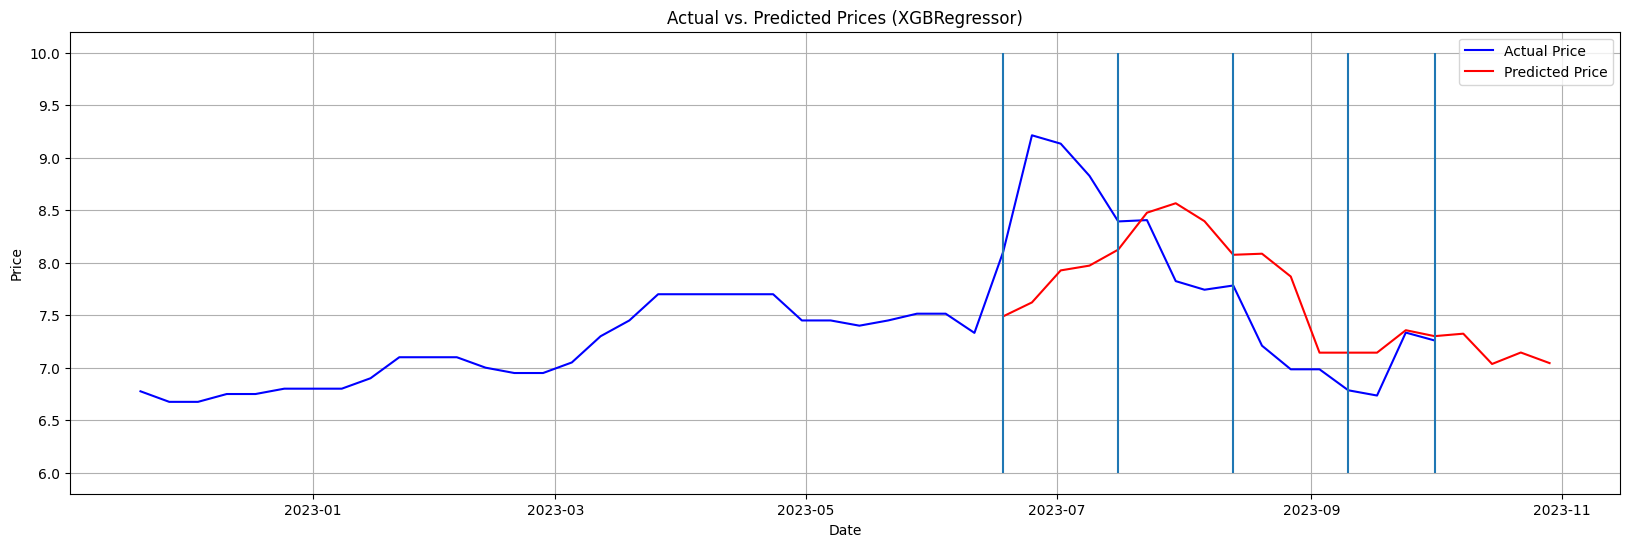

In [145]:
plot_actual_vs_predicted(actual_red, predicted_red, 'red', 6, 10, 'XGBRegressor' )

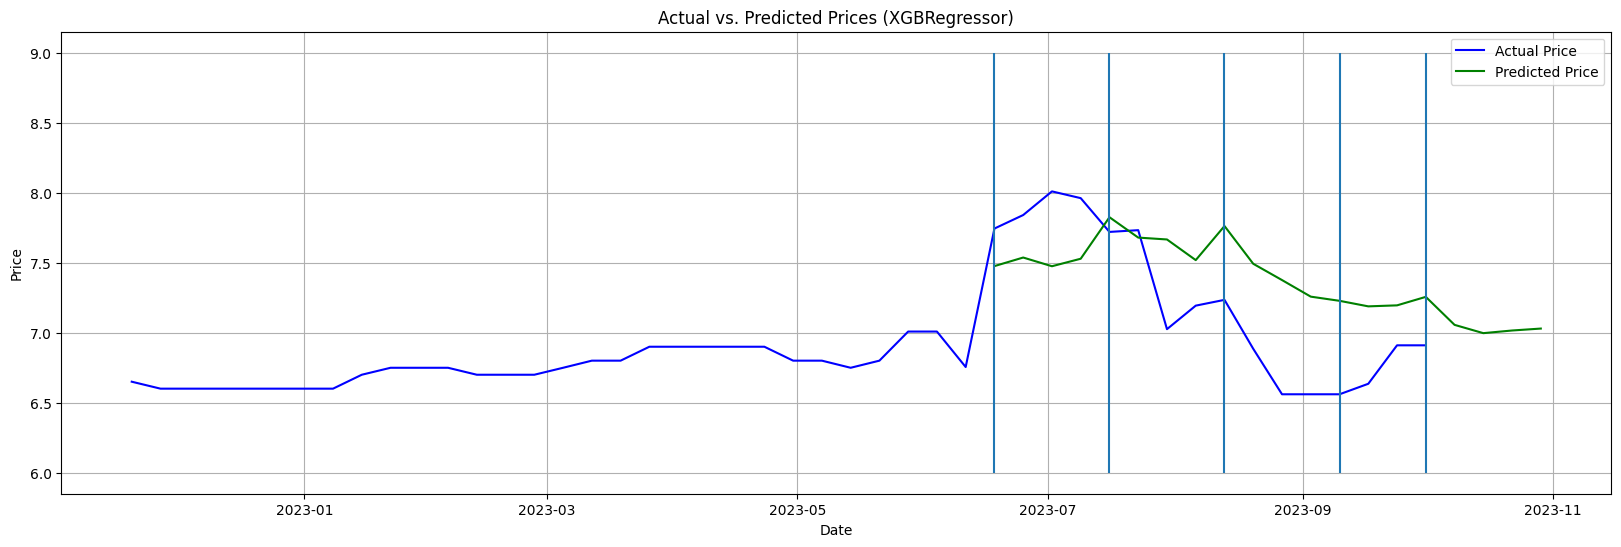

In [150]:
plot_actual_vs_predicted(actual_green, predicted_green, 'green', 6, 9, 'XGBRegressor' )

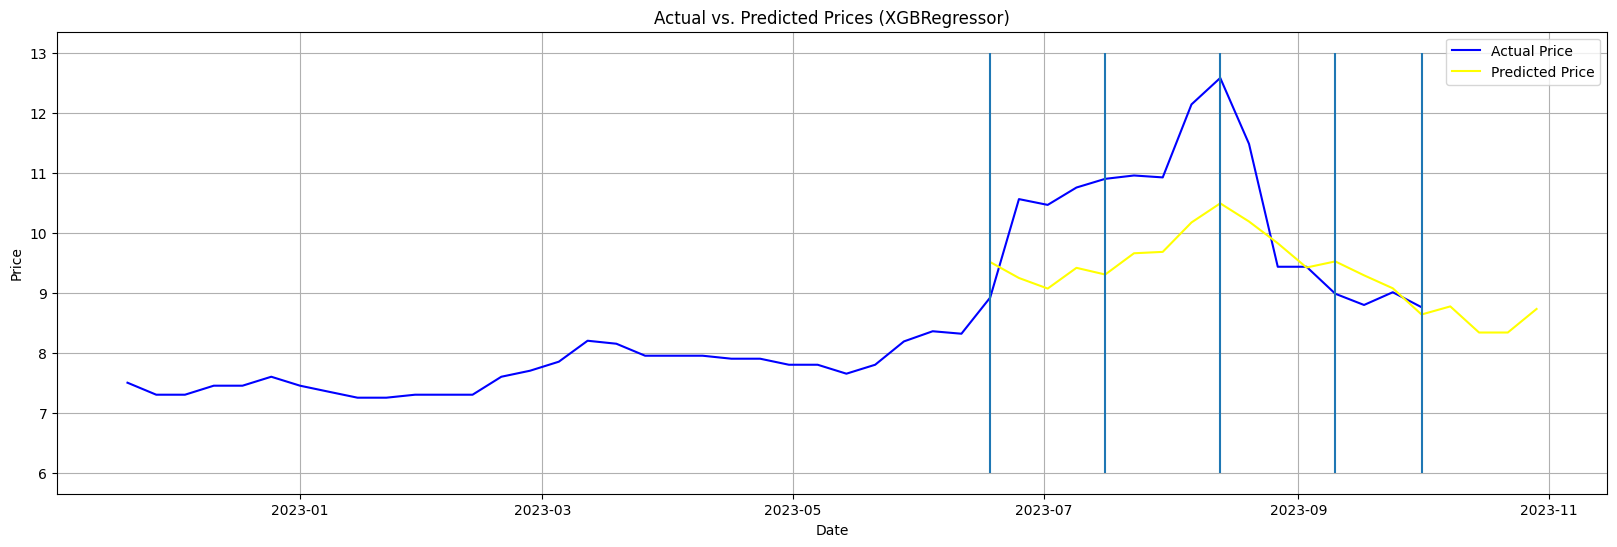

In [148]:
plot_actual_vs_predicted(actual_yellow, predicted_yellow, 'yellow', 6, 13, 'XGBRegressor' )